In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd

file_path = '/content/drive/MyDrive/Sleep_Health.csv'
try:
  df = pd.read_csv(file_path)
  display(df.head())
except FileNotFoundError:
  print(f"Error: The file '{file_path}' was not found. Please make sure the file is in your Google Drive at the specified path.")
except Exception as e:
  print(f"An error occurred: {e}")

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [13]:
display(df.describe())

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [15]:
df.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [16]:
display(df.isnull().sum())

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [17]:
display(df.duplicated().sum())

np.int64(0)

In [18]:
for col in df.select_dtypes(include='object').columns:
  print(f"Unique values for column '{col}':")
  display(df[col].unique())
  print("-" * 30)

Unique values for column 'Gender':


array(['Male', 'Female'], dtype=object)

------------------------------
Unique values for column 'Occupation':


array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

------------------------------
Unique values for column 'BMI Category':


array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

------------------------------
Unique values for column 'Blood Pressure':


array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

------------------------------
Unique values for column 'Sleep Disorder':


array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

------------------------------


In [19]:
df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
display(df[['Blood Pressure', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']].head())

,Blood Pressure,Systolic Blood Pressure,Diastolic Blood Pressure
0,126/83,126,83
1,125/80,125,80
2,125/80,125,80
3,140/90,140,90
4,140/90,140,90


In [20]:
df['Has Sleep Disorder'] = df['Sleep Disorder'].notna().astype(int)
display(df[['Sleep Disorder', 'Has Sleep Disorder']].head())

,Sleep Disorder,Has Sleep Disorder
0,NaN,0
1,NaN,0
2,NaN,0
3,Sleep Apnea,1
4,Sleep Apnea,1


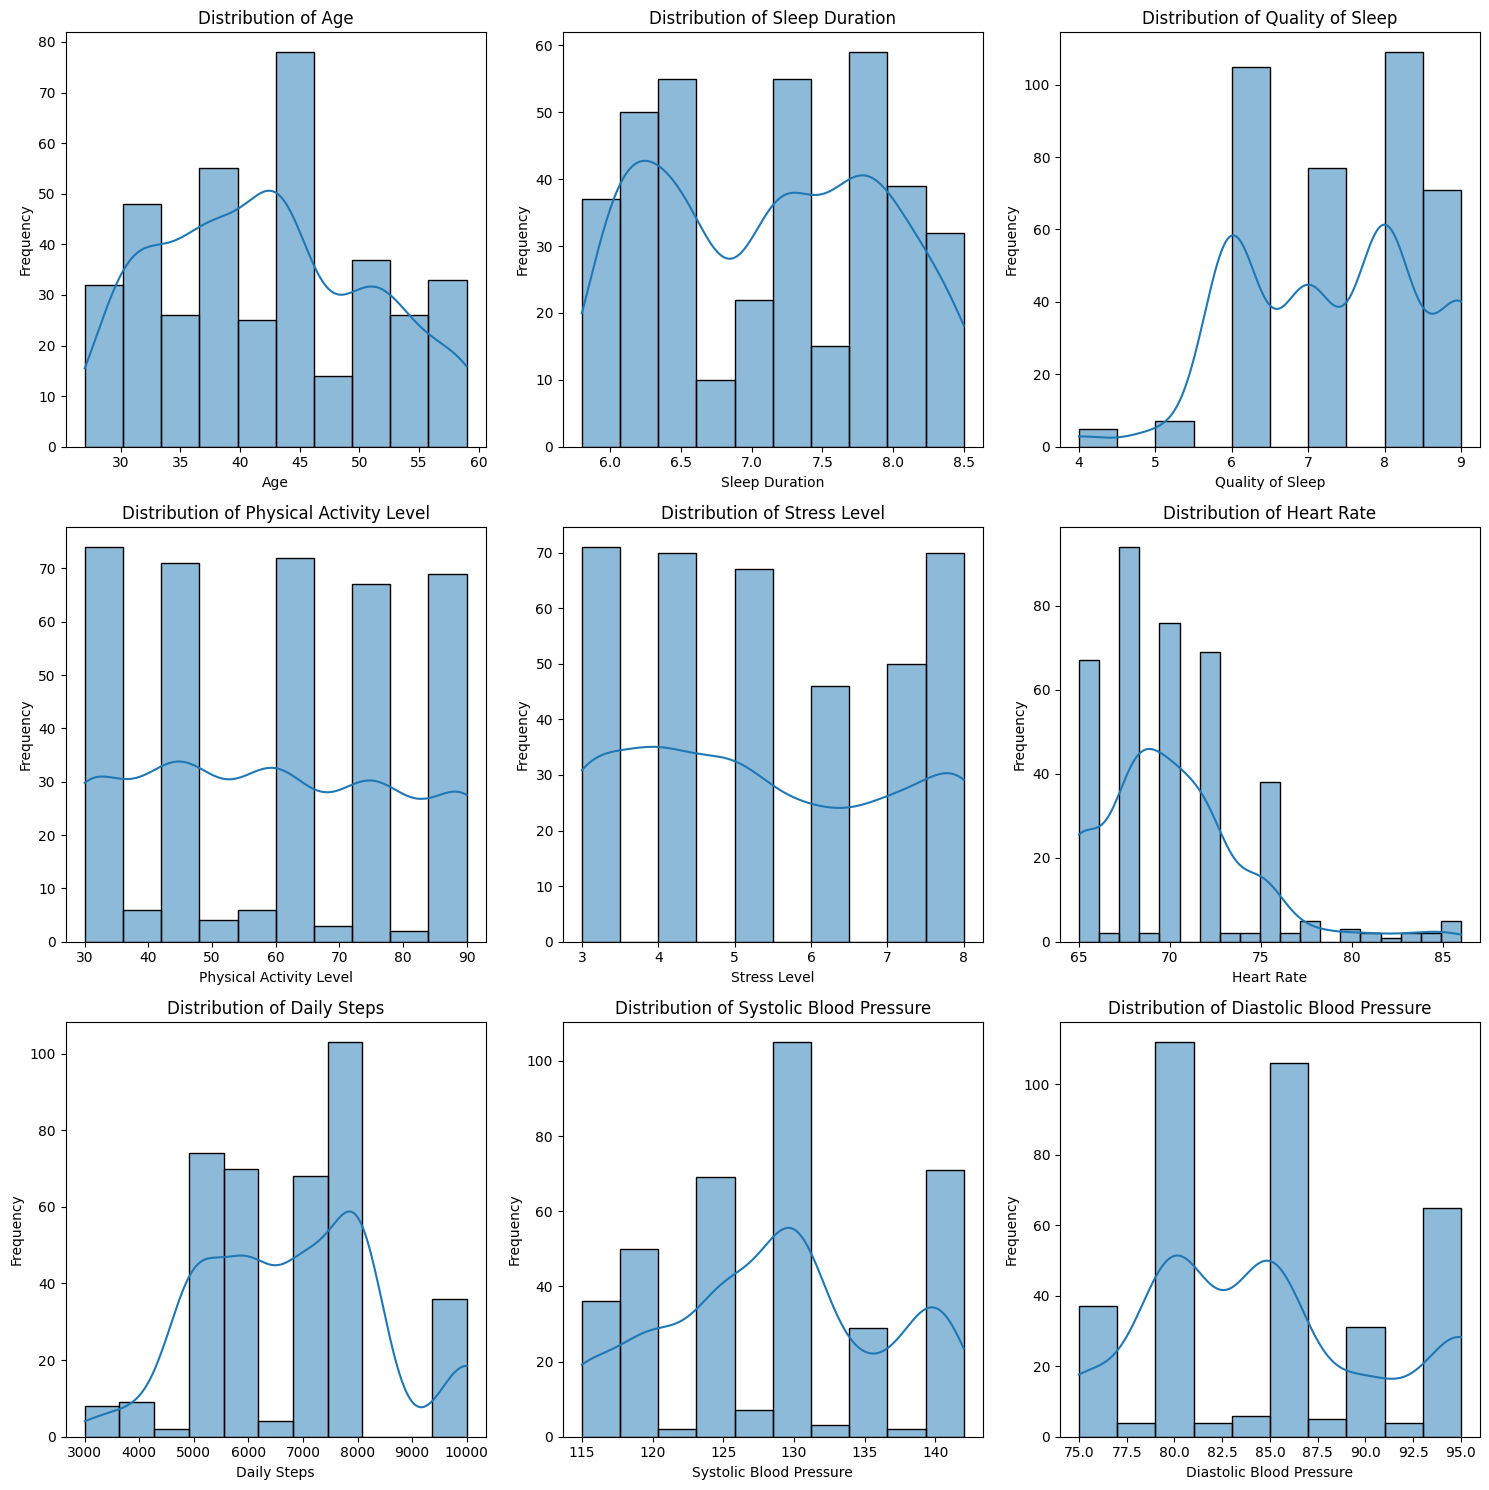

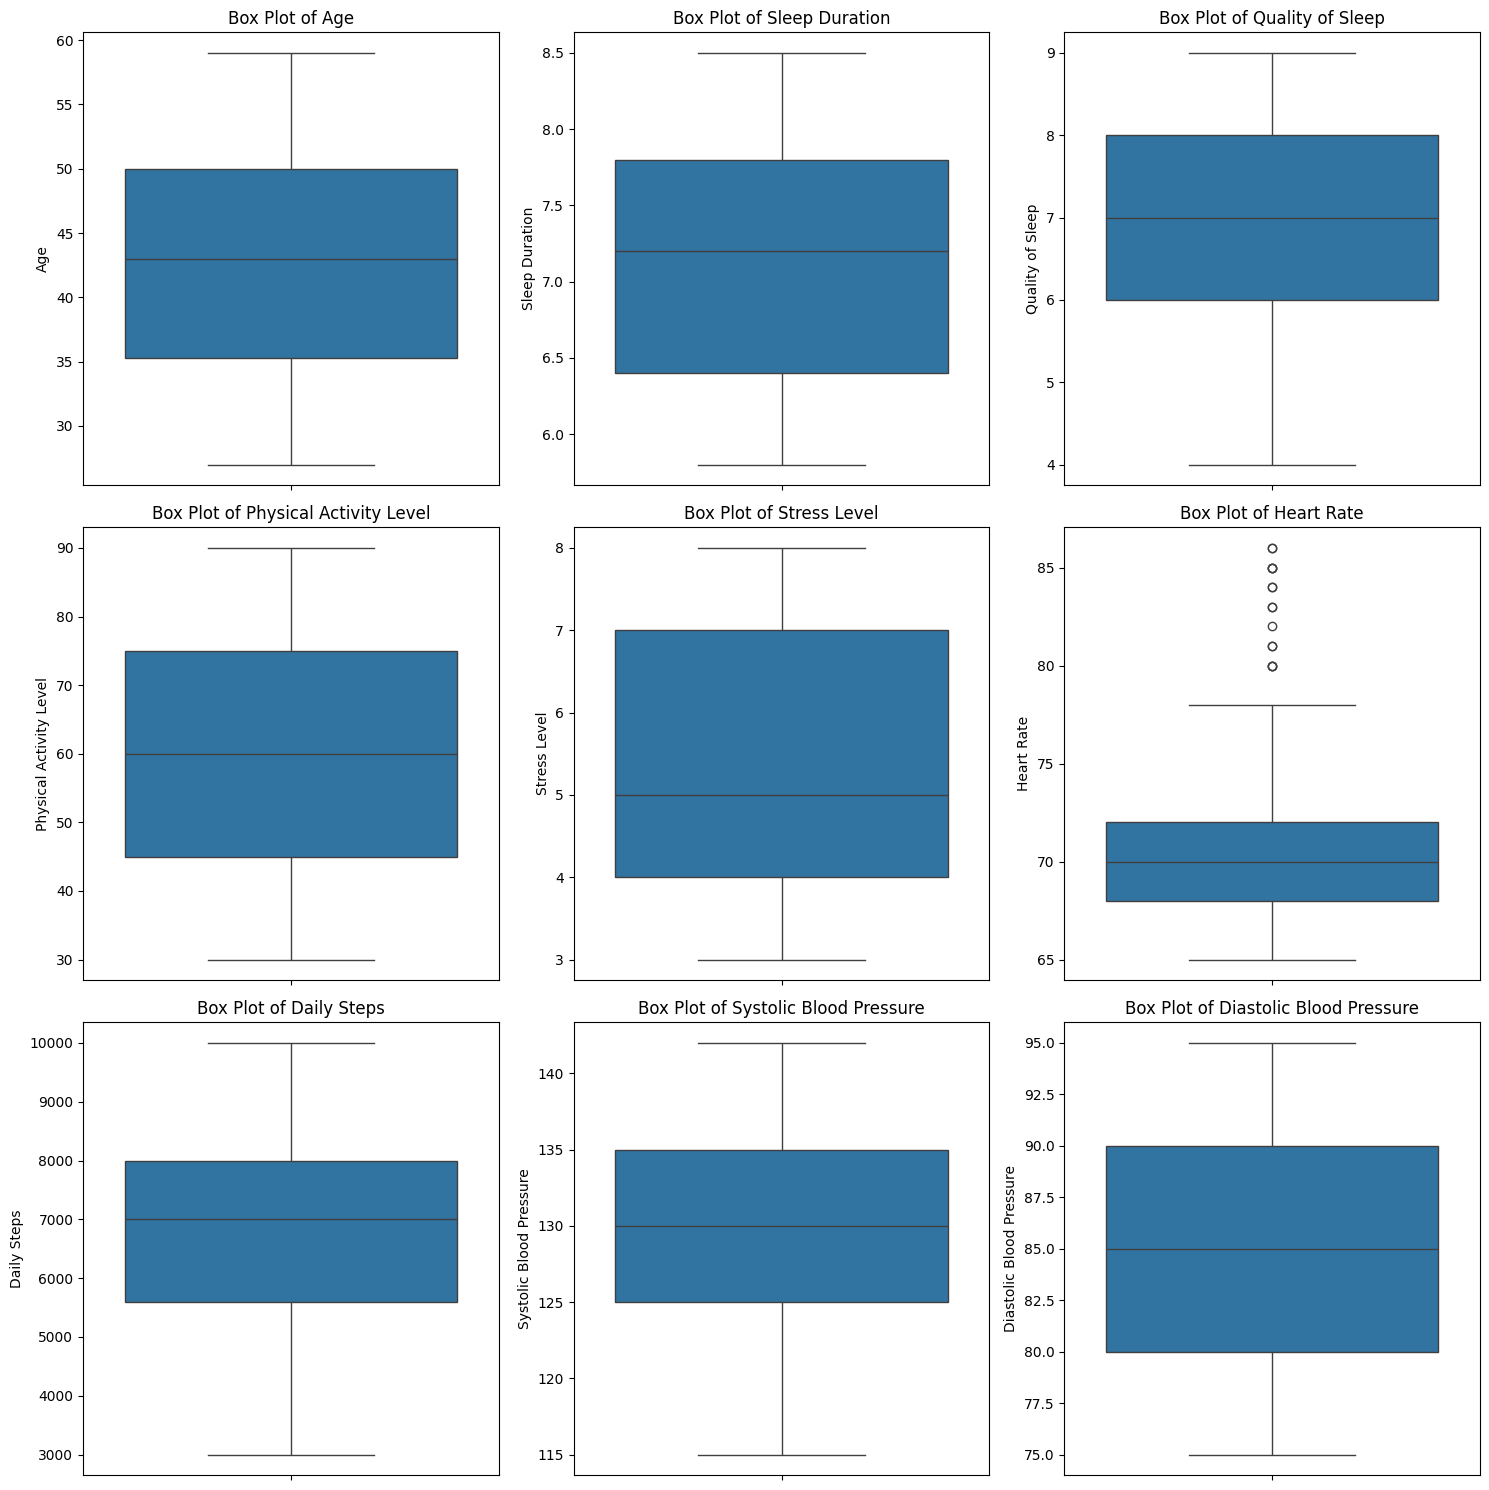

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']

# Determine the number of rows and columns for the subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots for histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Create subplots for box plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The plots above show the distribution of the numerical variables in the dataset.

*   **Histograms:** The histograms display the frequency distribution of each numerical variable. They give us an idea of the shape of the distribution (e.g., normal, skewed), the central tendency, and the spread of the data.
*   **Box Plots:** The box plots summarize the distribution of each numerical variable using quartiles. They show the median, interquartile range, and potential outliers. Outliers are data points that fall significantly outside the typical range of values.

By examining these plots, we can gain insights into the characteristics of each numerical variable, such as whether the data is concentrated in a particular range, if there are multiple peaks in the distribution, or if there are any extreme values that might warrant further investigation.

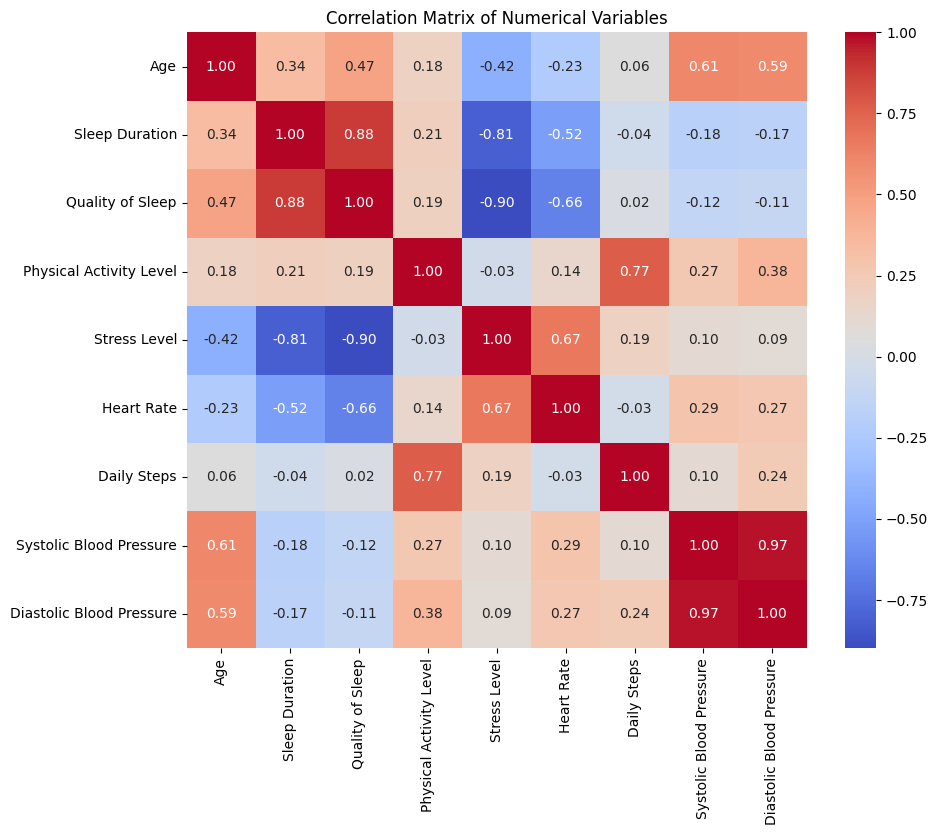

In [22]:
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

The correlation matrix you see displays the pairwise correlation coefficients between the numerical variables in your dataset.

Here's a quick guide on how to interpret it:

*   **Values range from -1 to 1:**
    *   A value of **1** indicates a perfect positive linear correlation (as one variable increases, the other increases proportionally).
    *   A value of **-1** indicates a perfect negative linear correlation (as one variable increases, the other decreases proportionally).
    *   A value of **0** indicates no linear correlation.
*   **The diagonal (where a variable is correlated with itself) will always be 1.**
*   **The matrix is symmetrical** because the correlation between variable A and variable B is the same as the correlation between variable B and variable A.

Looking at the matrix, you can identify which variables have strong positive or negative relationships. For example, a high positive value between 'Sleep Duration' and 'Quality of Sleep' would suggest that longer sleep duration is associated with higher quality sleep. Conversely, a strong negative value between 'Sleep Duration' and 'Stress Level' would suggest that higher stress levels are associated with shorter sleep duration.

/tmp/ipython-input-988871433.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bmi_bp, x='BMI Category', y='Systolic Blood Pressure', ax=axes[0], palette='viridis')
/tmp/ipython-input-988871433.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bmi_bp, x='BMI Category', y='Diastolic Blood Pressure', ax=axes[1], palette='viridis')


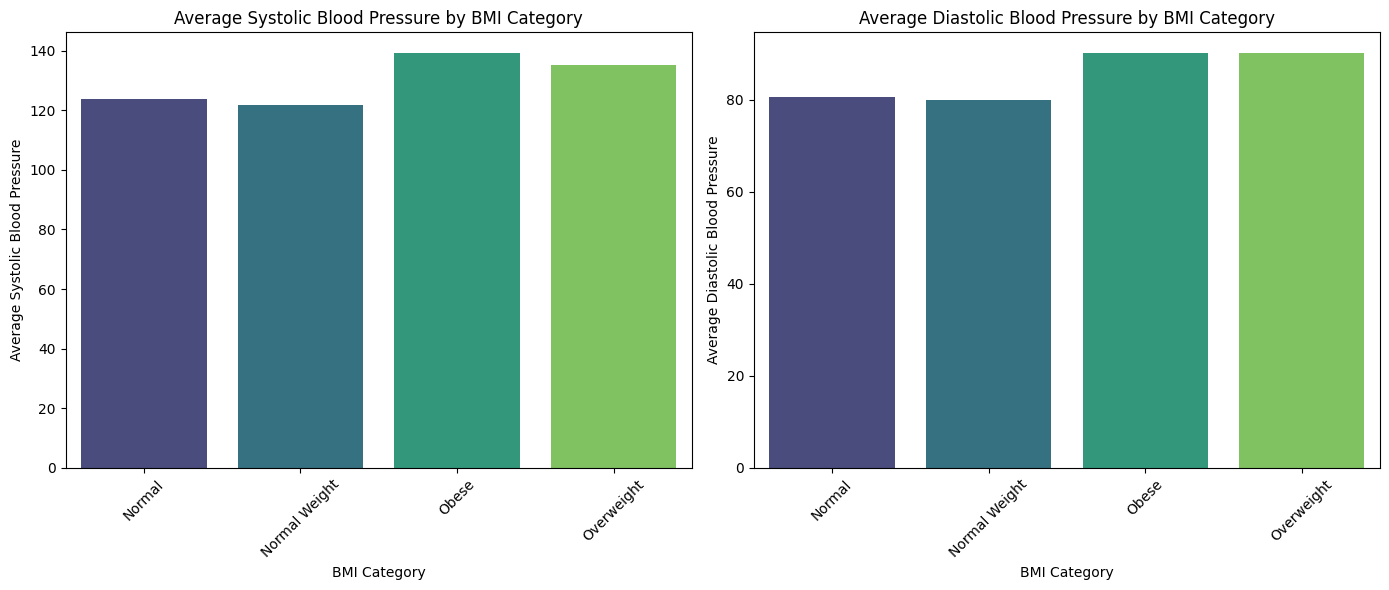

In [23]:
bmi_bp = df.groupby('BMI Category')[['Systolic Blood Pressure', 'Diastolic Blood Pressure']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=bmi_bp, x='BMI Category', y='Systolic Blood Pressure', ax=axes[0], palette='viridis')
axes[0].set_title('Average Systolic Blood Pressure by BMI Category')
axes[0].set_xlabel('BMI Category')
axes[0].set_ylabel('Average Systolic Blood Pressure')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=bmi_bp, x='BMI Category', y='Diastolic Blood Pressure', ax=axes[1], palette='viridis')
axes[1].set_title('Average Diastolic Blood Pressure by BMI Category')
axes[1].set_xlabel('BMI Category')
axes[1].set_ylabel('Average Diastolic Blood Pressure')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The bar plots above illustrate the average systolic and diastolic blood pressure for each BMI category.

Here's what we can observe from these plots:

*   **Systolic Blood Pressure:** The bar plot on the left shows the average systolic blood pressure for each BMI category. It appears that individuals in the **Obese** category tend to have the highest average systolic blood pressure, followed by the **Overweight** category. The **Normal** and **Normal Weight** categories have lower average systolic blood pressure.
*   **Diastolic Blood Pressure:** Similarly, the bar plot on the right displays the average diastolic blood pressure by BMI category. This plot also suggests that the **Obese** and **Overweight** categories have higher average diastolic blood pressure compared to the **Normal** and **Normal Weight** categories.

These visualizations suggest a potential relationship between BMI category and blood pressure, where higher BMI categories are associated with higher average blood pressure.

In [24]:
gender_grouped = df.groupby('Gender')[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']].mean()
print("Mean of numerical columns grouped by Gender:")
display(gender_grouped)

occupation_grouped = df.groupby('Occupation')[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']].mean()
print("\nMean of numerical columns grouped by Occupation:")
display(occupation_grouped)

bmi_grouped = df.groupby('BMI Category')[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']].mean()
print("\nMean of numerical columns grouped by BMI Category:")
display(bmi_grouped)

Mean of numerical columns grouped by Gender:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Blood Pressure,Diastolic Blood Pressure
Gender,,,,,,,,,
Female,47.405405,7.229730,7.664865,59.140541,4.675676,69.259459,6840.540541,130.200000,86.318919
Male,37.074074,7.036508,6.968254,59.201058,6.079365,71.052910,6793.650794,126.941799,83.015873



Mean of numerical columns grouped by Occupation:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Blood Pressure,Diastolic Blood Pressure
Occupation,,,,,,,,,
Accountant,39.621622,7.113514,7.891892,58.108108,4.594595,68.864865,6881.081081,117.729730,76.918919
Doctor,32.676056,6.970423,6.647887,55.352113,6.732394,71.521127,6808.450704,123.000000,80.507042
Engineer,46.587302,7.987302,8.412698,51.857143,3.888889,67.190476,5980.952381,125.904762,81.380952
Lawyer,39.425532,7.410638,7.893617,70.425532,5.063830,69.638298,7661.702128,129.957447,85.000000
Manager,45.000000,6.900000,7.000000,55.000000,5.000000,75.000000,5500.000000,125.000000,82.000000
Nurse,51.794521,7.063014,7.369863,78.589041,5.547945,72.000000,8057.534247,138.520548,93.726027
Sales Representative,28.000000,5.900000,4.000000,30.000000,8.000000,85.000000,3000.000000,140.000000,90.000000
Salesperson,43.531250,6.403125,6.000000,45.000000,7.000000,72.000000,6000.000000,130.000000,85.000000
Scientist,33.500000,6.000000,5.000000,41.000000,7.000000,78.500000,5350.000000,129.500000,85.500000



Mean of numerical columns grouped by BMI Category:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Blood Pressure,Diastolic Blood Pressure
BMI Category,,,,,,,,,
Normal,38.482051,7.393846,7.661538,57.692308,5.128205,68.728205,6887.179487,123.820513,80.666667
Normal Weight,38.380952,7.333333,7.428571,60.333333,5.190476,71.285714,6766.666667,121.619048,80.000000
Obese,38.000000,6.960000,6.400000,55.000000,5.700000,84.300000,3350.000000,139.200000,90.200000
Overweight,47.885135,6.770270,6.898649,61.236486,5.729730,70.945946,6965.540541,135.054054,90.182432


In [25]:
sleep_disorder_grouped = df.groupby('Has Sleep Disorder')[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']].mean()
print("Mean of numerical columns grouped by 'Has Sleep Disorder':")
display(sleep_disorder_grouped)

Mean of numerical columns grouped by 'Has Sleep Disorder':


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Blood Pressure,Diastolic Blood Pressure
Has Sleep Disorder,,,,,,,,,
0,39.036530,7.358447,7.625571,57.949772,5.114155,69.018265,6852.968037,124.045662,81.000000
1,46.632258,6.812258,6.870968,60.896774,5.767742,71.787097,6765.806452,134.922581,89.806452


/tmp/ipython-input-868598120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', ax=axes[0], palette='viridis')
/tmp/ipython-input-868598120.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Occupation', ax=axes[1], palette='viridis')
/tmp/ipython-input-868598120.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='BMI Category', ax=axes[2], palette='viridis')


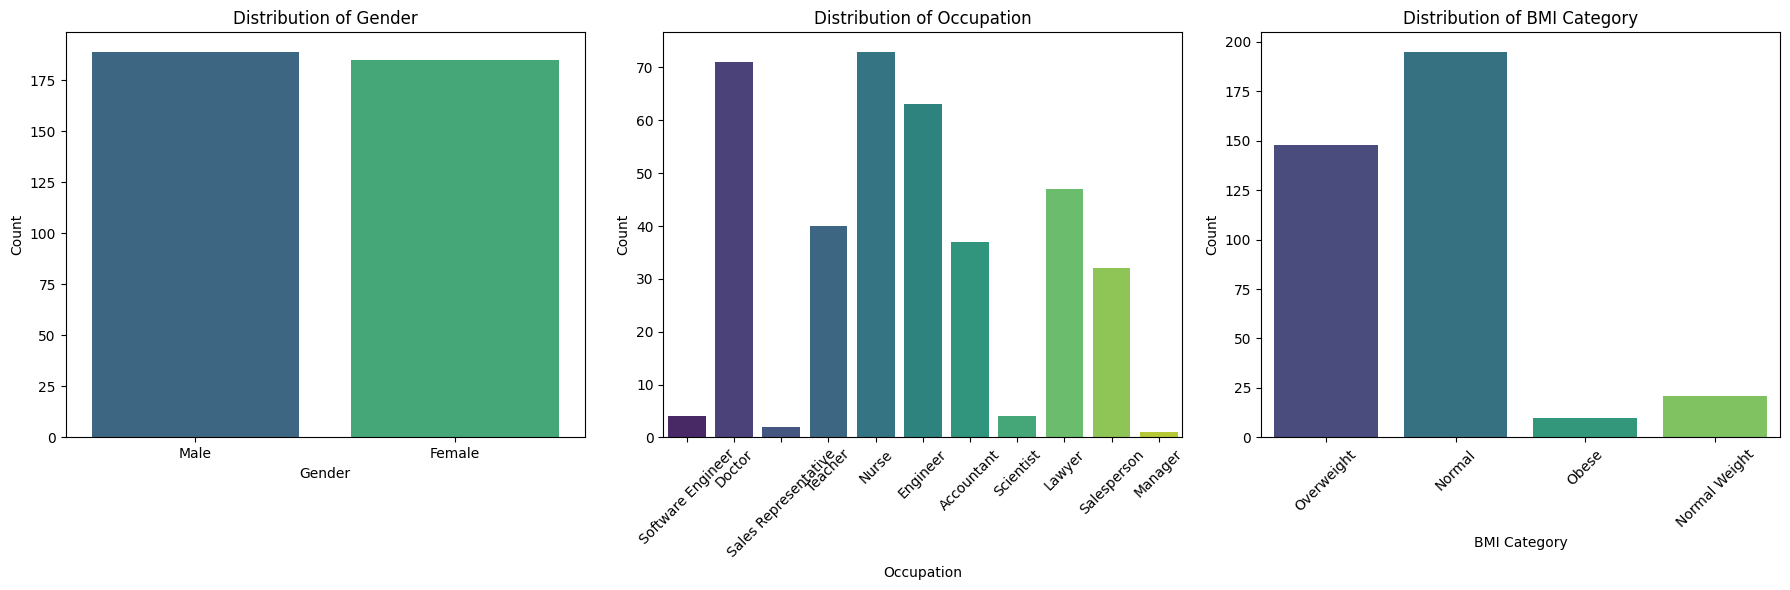

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=df, x='Gender', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Occupation', ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Occupation')
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='BMI Category', ax=axes[2], palette='viridis')
axes[2].set_title('Distribution of BMI Category')
axes[2].set_xlabel('BMI Category')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The violin plots above show the distribution of Sleep Duration, Quality of Sleep, and Stress Level across different occupations.

*   **Sleep Duration by Occupation:** This plot reveals the range and distribution of sleep duration for each occupation. You can observe variations in typical sleep hours and the spread of data within each profession. Some occupations might show a tighter distribution around the mean, while others might have a wider range of sleep durations.
*   **Quality of Sleep by Occupation:** This plot illustrates how the quality of sleep varies among different occupations. You can see if certain jobs are associated with generally higher or lower sleep quality and the variability within each group.
*   **Stress Level by Occupation:** This plot displays the distribution of stress levels for each occupation. It highlights which professions tend to have higher or lower stress levels and the consistency of stress within those groups.

By examining these plots, you can gain insights into potential relationships between occupation and sleep patterns or stress levels. For instance, you might observe if high-stress occupations tend to have shorter sleep durations or lower sleep quality.

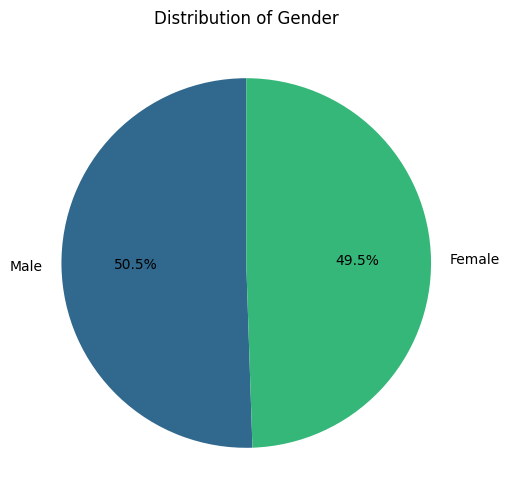

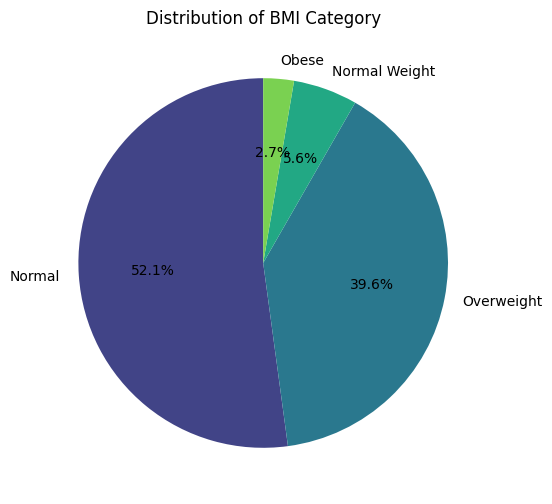

In [27]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(gender_counts)))
plt.title('Distribution of Gender')
plt.show()

bmi_counts = df['BMI Category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(bmi_counts)))
plt.title('Distribution of BMI Category')
plt.show()

The pie charts above show the distribution of Gender and BMI Category in the dataset.

*   **Distribution of Gender:** This pie chart displays the proportion of Male and Female individuals in the dataset. It provides a clear visual representation of the gender balance.
*   **Distribution of BMI Category:** This pie chart shows the proportion of individuals in each BMI Category (Normal, Overweight, Obese, and Normal Weight). It helps to understand the prevalence of different weight categories in the dataset.

These pie charts provide a quick overview of the demographic breakdown of the dataset in terms of gender and BMI.

/tmp/ipython-input-580456080.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Occupation', y='Sleep Duration', ax=axes[0], palette='viridis')
/tmp/ipython-input-580456080.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Occupation', y='Quality of Sleep', ax=axes[1], palette='viridis')
/tmp/ipython-input-580456080.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Occupation', y='Stress Level', ax=axes[2], palette='viridis')


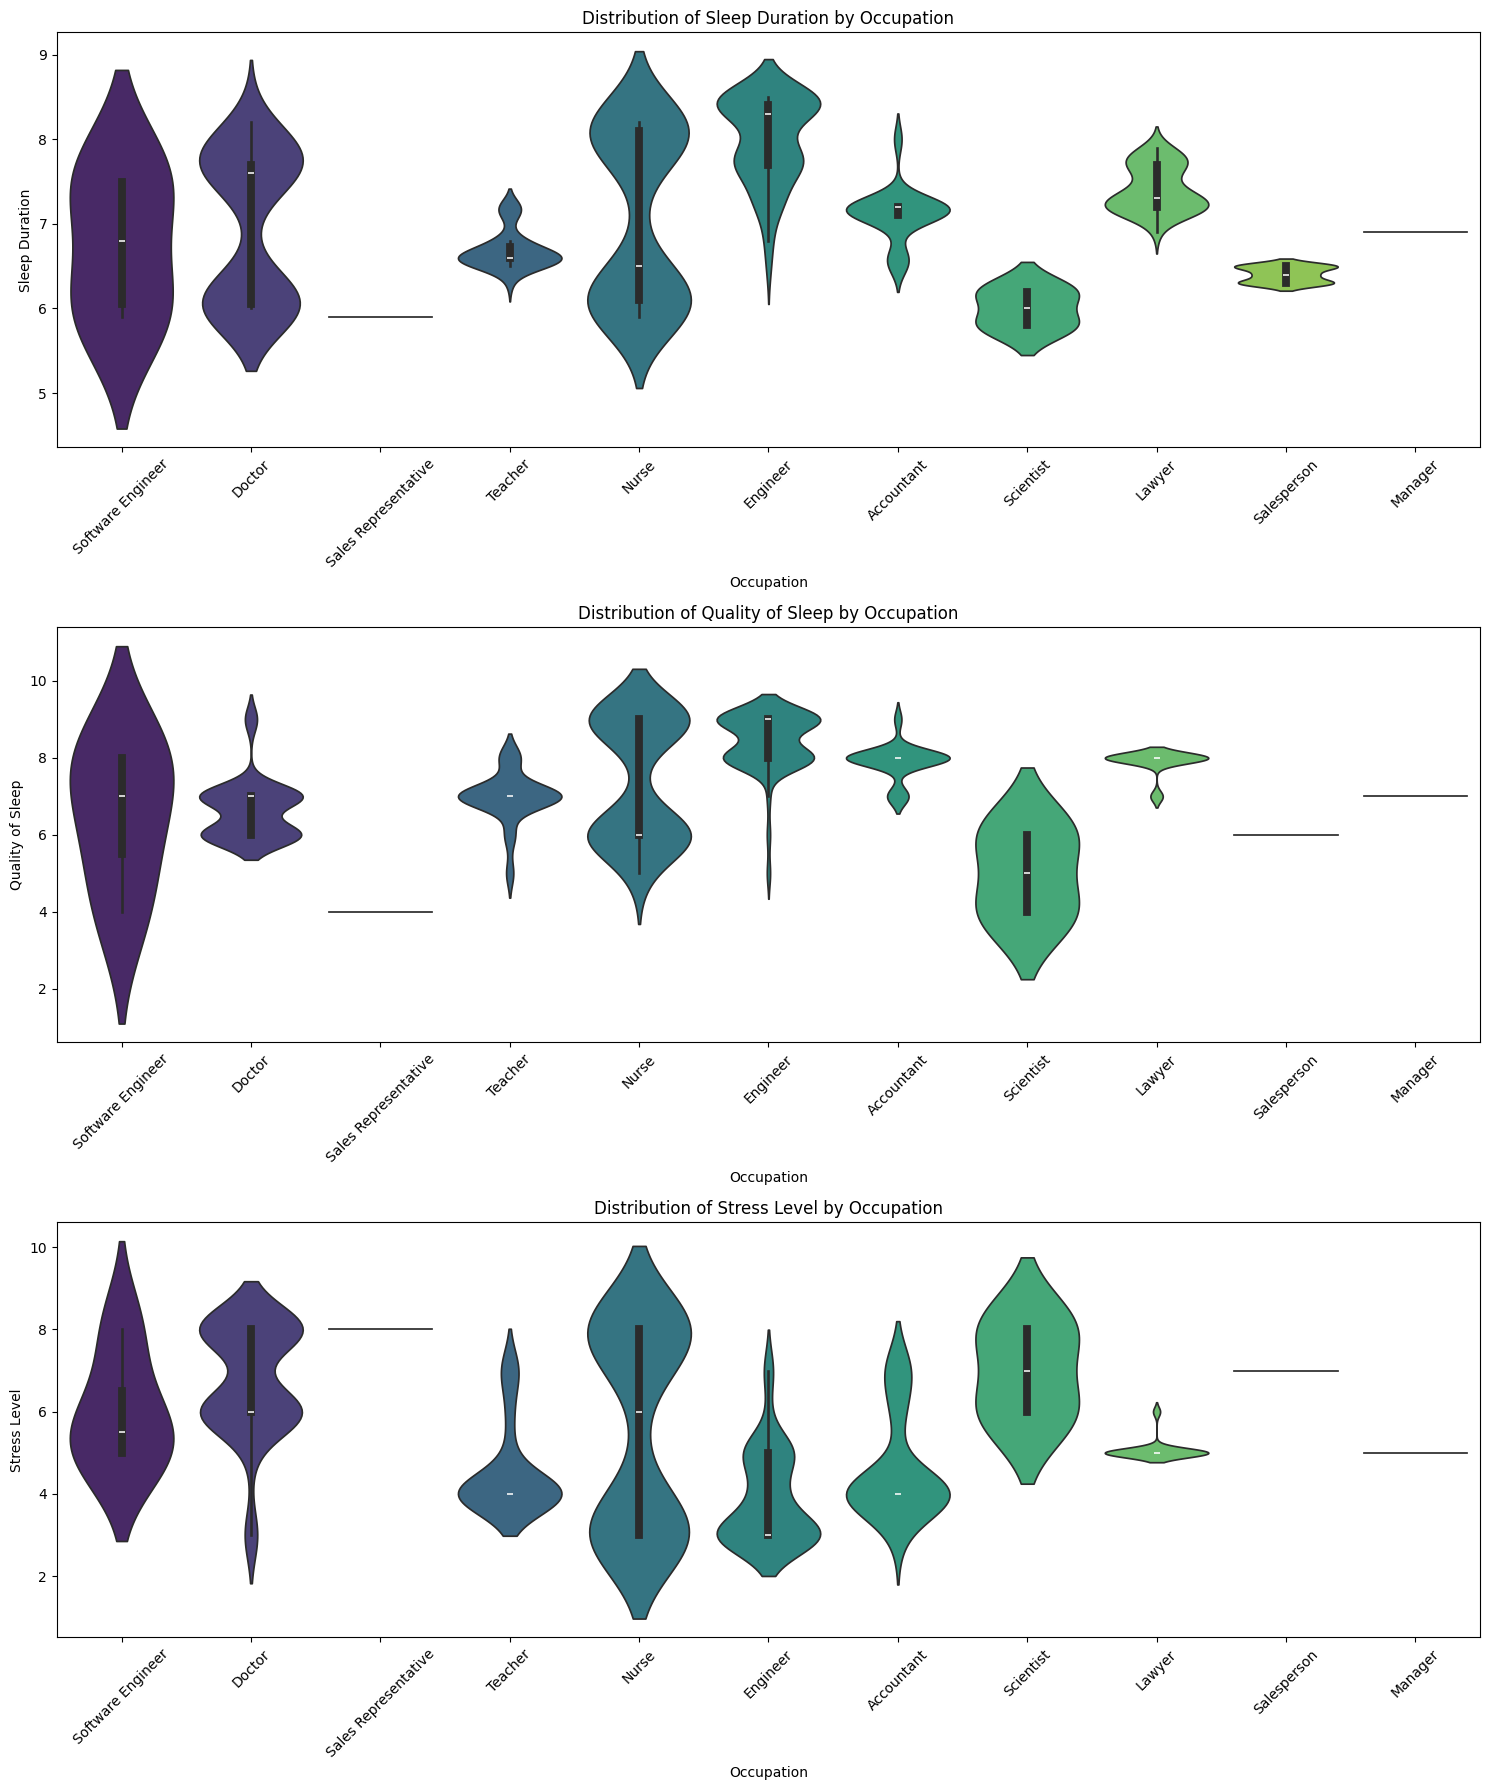

In [28]:
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

sns.violinplot(data=df, x='Occupation', y='Sleep Duration', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Sleep Duration by Occupation')
axes[0].set_xlabel('Occupation')
axes[0].set_ylabel('Sleep Duration')
axes[0].tick_params(axis='x', rotation=45)

sns.violinplot(data=df, x='Occupation', y='Quality of Sleep', ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Quality of Sleep by Occupation')
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Quality of Sleep')
axes[1].tick_params(axis='x', rotation=45)

sns.violinplot(data=df, x='Occupation', y='Stress Level', ax=axes[2], palette='viridis')
axes[2].set_title('Distribution of Stress Level by Occupation')
axes[2].set_xlabel('Occupation')
axes[2].set_ylabel('Stress Level')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The violin plots above show the distribution of Sleep Duration, Quality of Sleep, and Stress Level across different occupations.

*   **Sleep Duration by Occupation:** This plot reveals the range and distribution of sleep duration for each occupation. You can observe variations in typical sleep hours and the spread of data within each profession. Some occupations might show a tighter distribution around the mean, while others might have a wider range of sleep durations.
*   **Quality of Sleep by Occupation:** This plot illustrates how the quality of sleep varies among different occupations. You can see if certain jobs are associated with generally higher or lower sleep quality and the variability within each group.
*   **Stress Level by Occupation:** This plot displays the distribution of stress levels for each occupation. It highlights which professions tend to have higher or lower stress levels and the consistency of stress within those groups.

By examining these plots, you can gain insights into potential relationships between occupation and sleep patterns or stress levels. For instance, you might observe if high-stress occupations tend to have shorter sleep durations or lower sleep quality.

/tmp/ipython-input-3684604331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Age', ax=axes[0], palette='viridis')
/tmp/ipython-input-3684604331.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Physical Activity Level', ax=axes[1], palette='viridis')
/tmp/ipython-input-3684604331.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Daily Steps', ax=axes[2], palette='viridis')


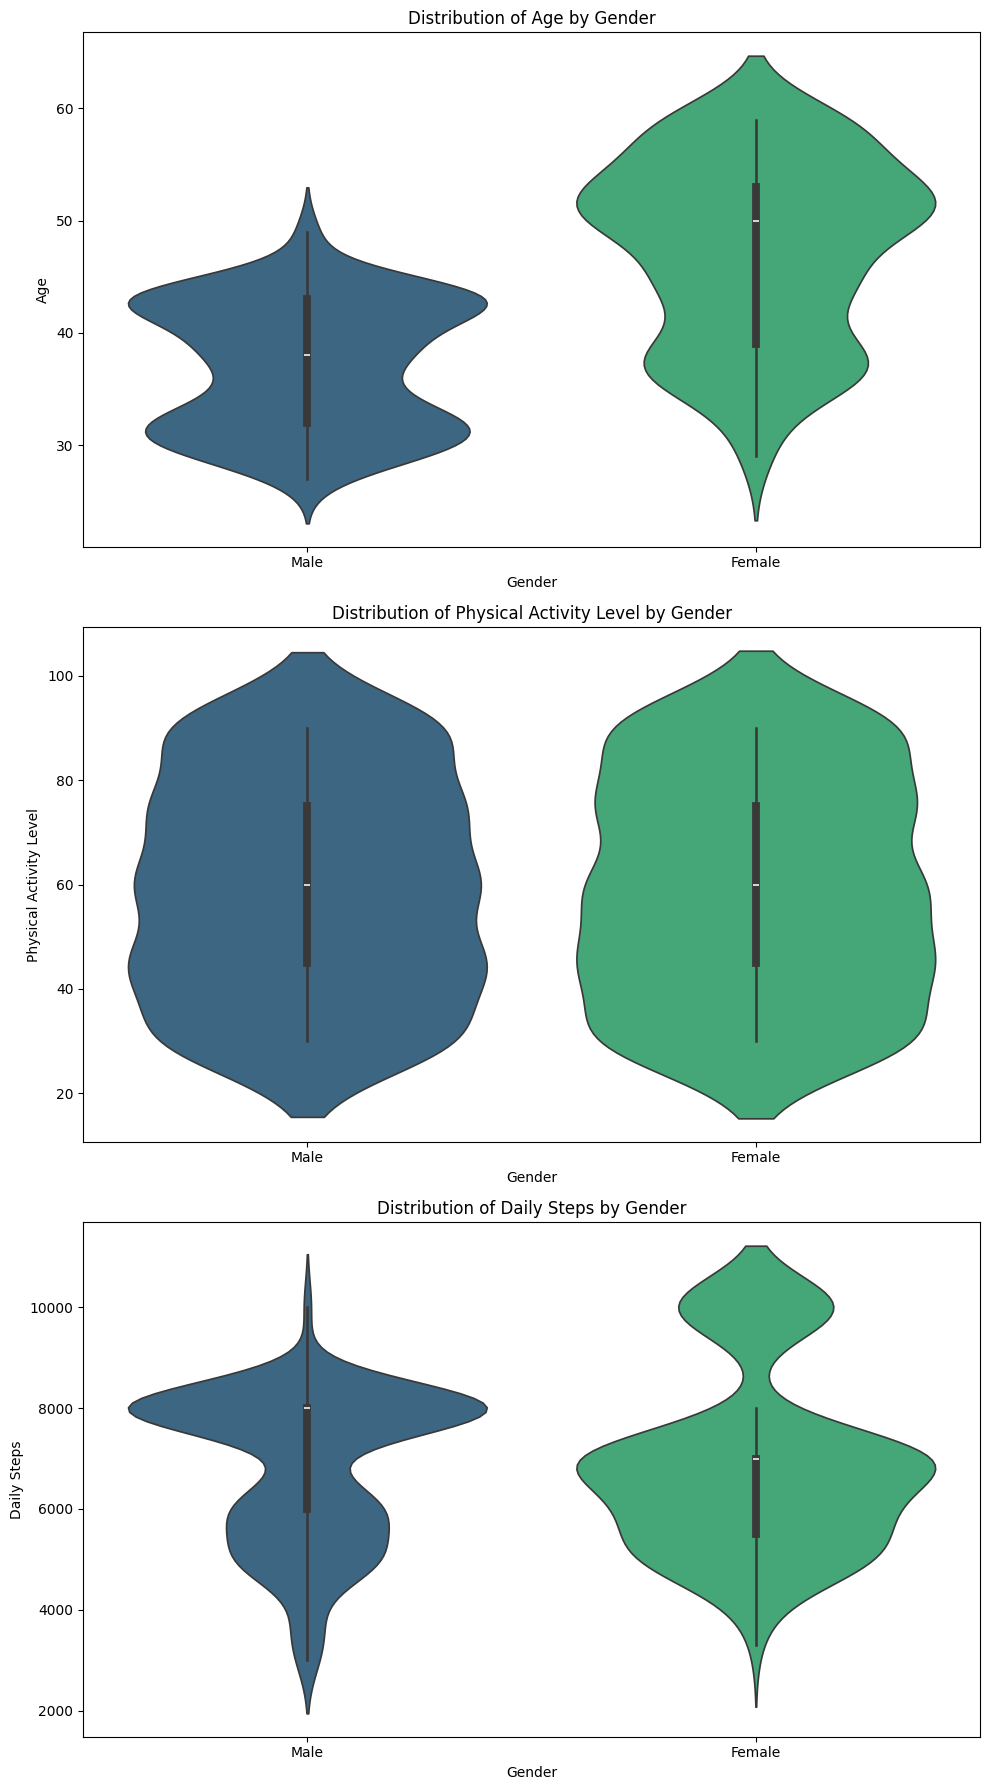

In [29]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

sns.violinplot(data=df, x='Gender', y='Age', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Age by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Age')

sns.violinplot(data=df, x='Gender', y='Physical Activity Level', ax=axes[1], palette='viridis')
axes[1].set_title('Distribution of Physical Activity Level by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Physical Activity Level')

sns.violinplot(data=df, x='Gender', y='Daily Steps', ax=axes[2], palette='viridis')
axes[2].set_title('Distribution of Daily Steps by Gender')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Daily Steps')

plt.tight_layout()
plt.show()

The violin plots above show the distribution of Age, Physical Activity Level, and Daily Steps across genders.

*   **Age by Gender:** This plot illustrates the distribution of ages for both male and female individuals in the dataset. You can observe the typical age range and the spread of ages within each gender group.
*   **Physical Activity Level by Gender:** This plot displays the distribution of physical activity levels for each gender. It helps to see if there are differences in activity levels between males and females and the variability within each group.
*   **Daily Steps by Gender:** This plot shows the distribution of daily steps taken by each gender. You can compare the typical number of steps and the range of steps for male and female individuals.

By examining these plots, you can gain insights into potential differences in age distribution, physical activity levels, and daily steps between genders in this dataset.

/tmp/ipython-input-713885276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='BMI Category', y='Heart Rate', ax=axes[0], palette='viridis')
/tmp/ipython-input-713885276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='BMI Category', y='Systolic Blood Pressure', ax=axes[1], palette='viridis')
/tmp/ipython-input-713885276.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='BMI Category', y='Diastolic Blood Pressure', ax=axes[2], palette='viridis')


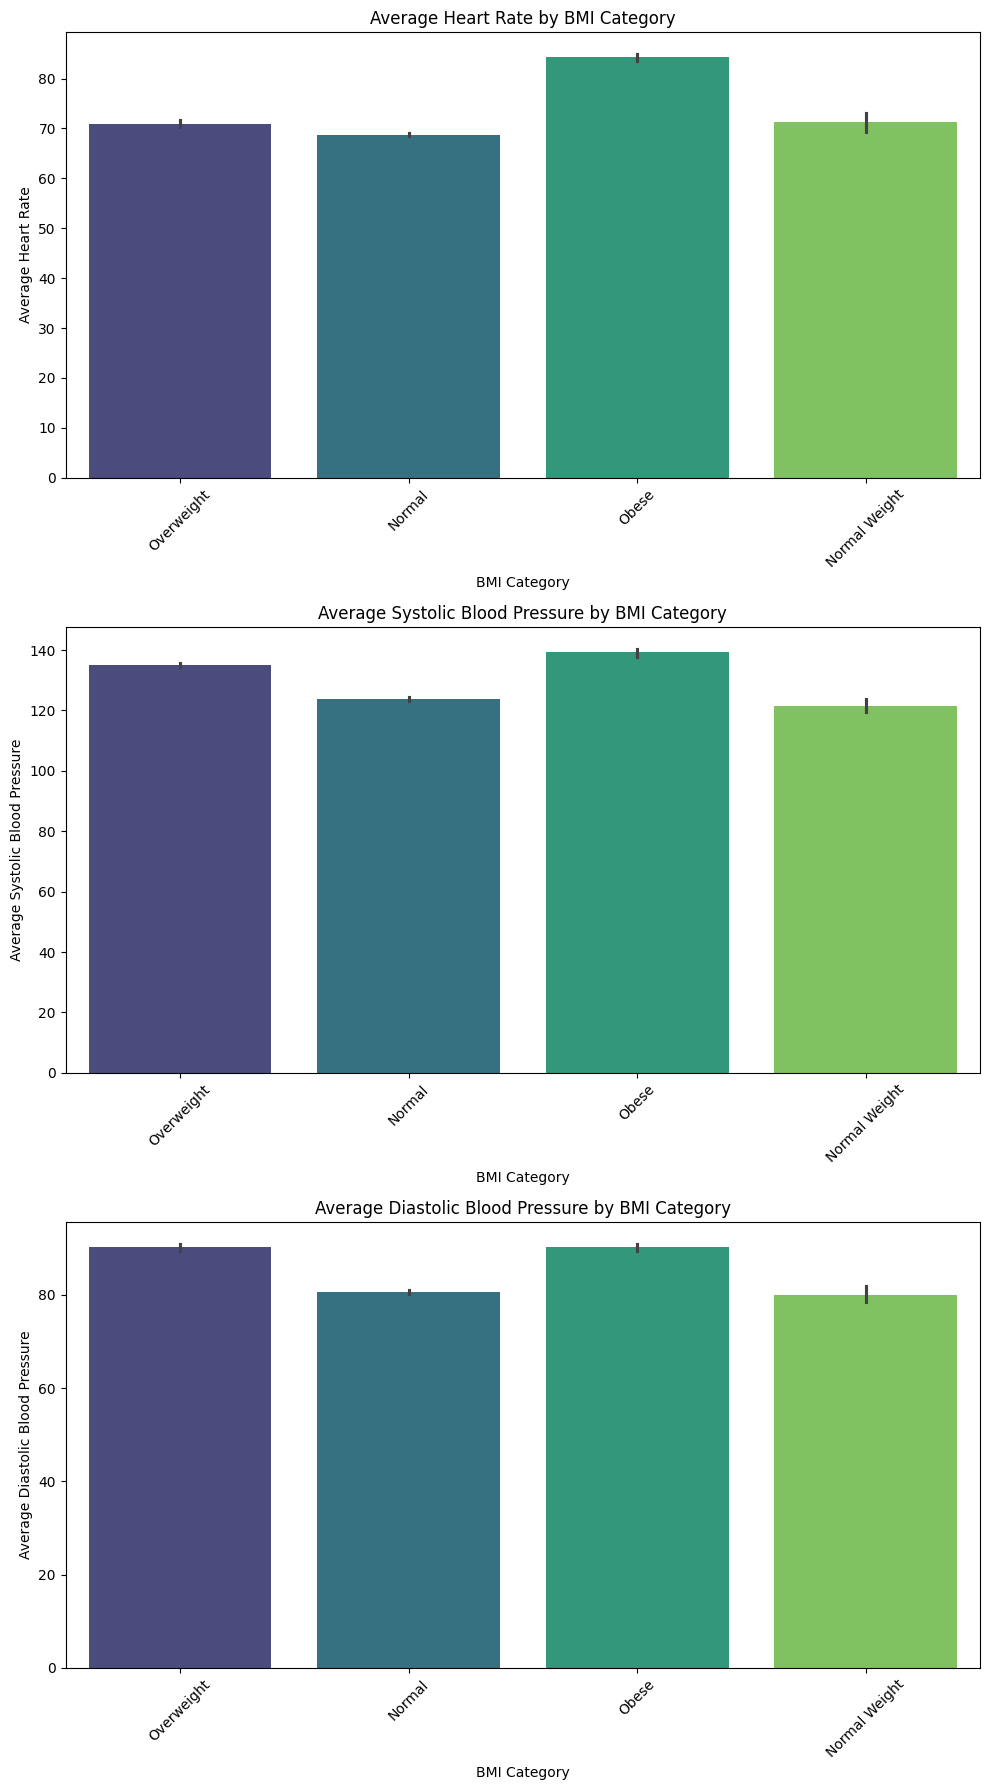

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

sns.barplot(data=df, x='BMI Category', y='Heart Rate', ax=axes[0], palette='viridis')
axes[0].set_title('Average Heart Rate by BMI Category')
axes[0].set_xlabel('BMI Category')
axes[0].set_ylabel('Average Heart Rate')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=df, x='BMI Category', y='Systolic Blood Pressure', ax=axes[1], palette='viridis')
axes[1].set_title('Average Systolic Blood Pressure by BMI Category')
axes[1].set_xlabel('BMI Category')
axes[1].set_ylabel('Average Systolic Blood Pressure')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(data=df, x='BMI Category', y='Diastolic Blood Pressure', ax=axes[2], palette='viridis')
axes[2].set_title('Average Diastolic Blood Pressure by BMI Category')
axes[2].set_xlabel('BMI Category')
axes[2].set_ylabel('Average Diastolic Blood Pressure')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The bar plots above illustrate the average Heart Rate, Systolic Blood Pressure, and Diastolic Blood Pressure for each BMI category.

Here's what we can observe from these plots:

*   **Average Heart Rate by BMI Category:** This plot shows the average heart rate for each BMI category. There appear to be some differences in average heart rate across categories, with the 'Obese' category showing a slightly higher average.
*   **Average Systolic Blood Pressure by BMI Category:** The bar plot shows that individuals in the **Obese** and **Overweight** categories tend to have higher average systolic blood pressure compared to the **Normal** and **Normal Weight** categories.
*   **Average Diastolic Blood Pressure by BMI Category:** This plot also suggests that the **Obese** and **Overweight** categories have higher average diastolic blood pressure compared to the **Normal** and **Normal Weight** categories.

These visualizations reinforce the potential relationship between BMI category and blood pressure, and also suggest a possible link with heart rate.

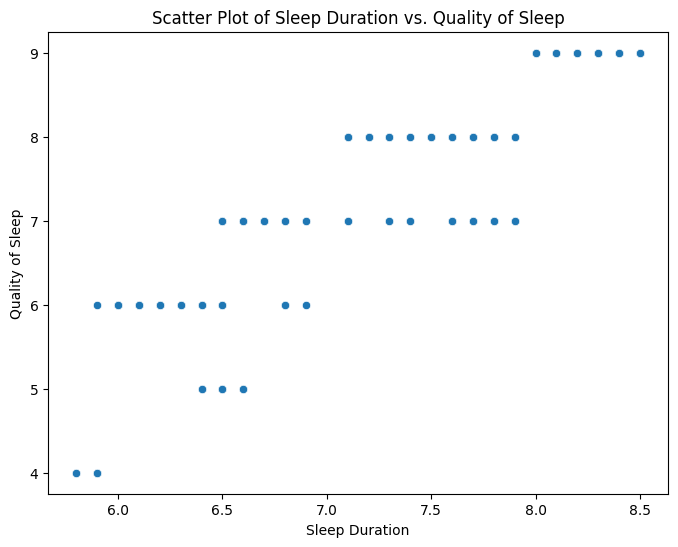

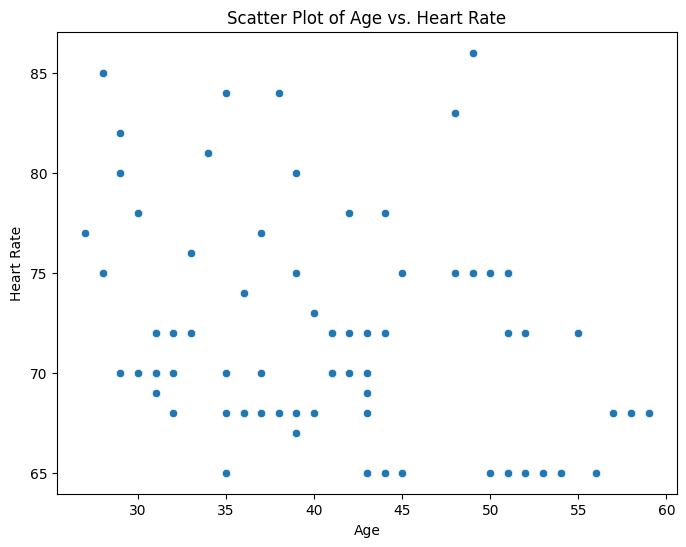

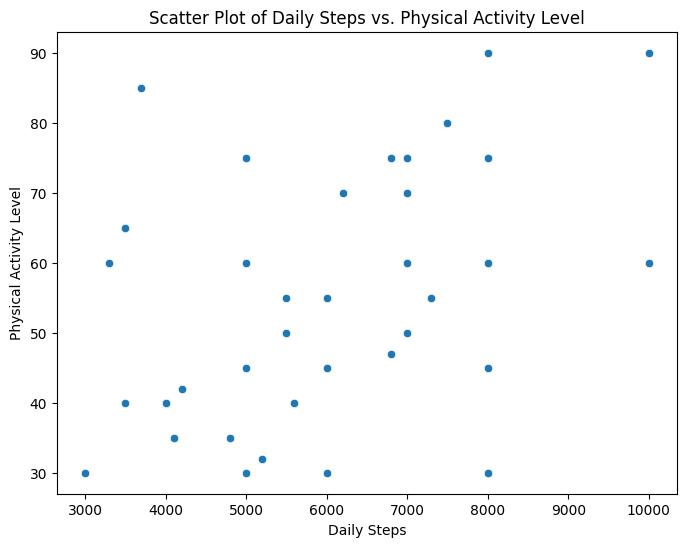

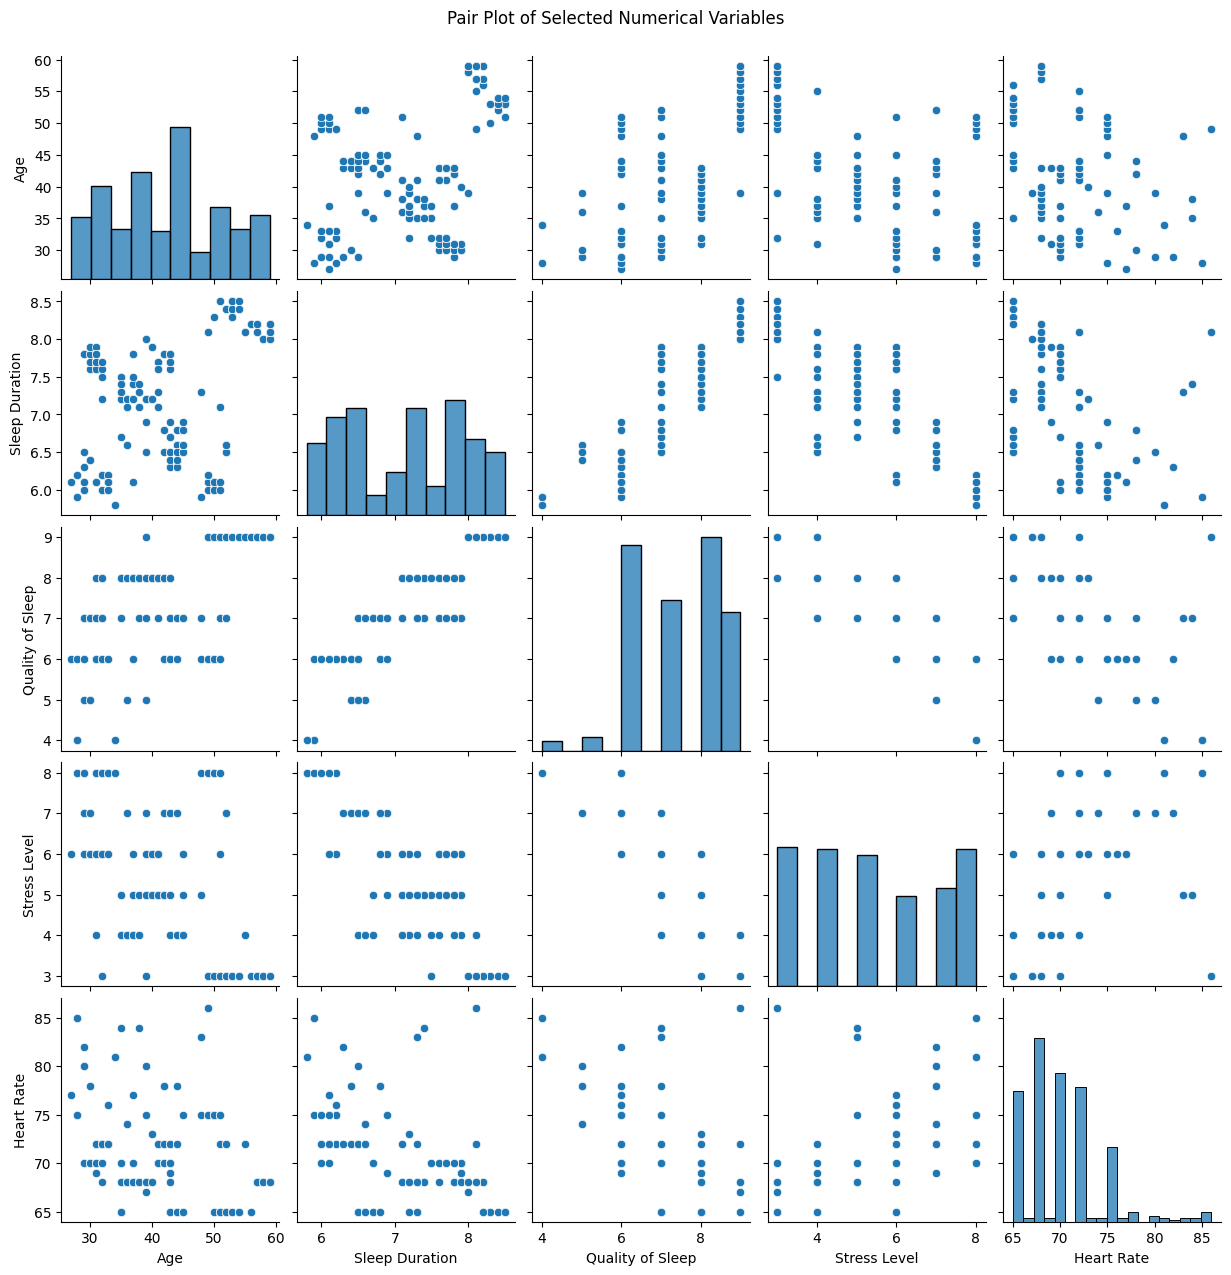

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sleep Duration', y='Quality of Sleep')
plt.title('Scatter Plot of Sleep Duration vs. Quality of Sleep')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Heart Rate')
plt.title('Scatter Plot of Age vs. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Daily Steps', y='Physical Activity Level')
plt.title('Scatter Plot of Daily Steps vs. Physical Activity Level')
plt.xlabel('Daily Steps')
plt.ylabel('Physical Activity Level')
plt.show()

numerical_cols_for_pairplot = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Heart Rate']
sns.pairplot(df[numerical_cols_for_pairplot])
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)
plt.show()

The scatter plots and pair plot above visualize the relationships between various numerical variables.

*   **Scatter Plot of Sleep Duration vs. Quality of Sleep:** This plot shows the relationship between how long someone sleeps and the perceived quality of their sleep. A positive correlation is expected, meaning longer sleep duration is generally associated with higher quality sleep. The plot helps visualize the strength and linearity of this relationship, as well as any potential outliers.
*   **Scatter Plot of Age vs. Heart Rate:** This plot explores the relationship between age and heart rate. It can help determine if there's a trend of heart rate changing with age and the variability in heart rate at different ages.
*   **Scatter Plot of Daily Steps vs. Physical Activity Level:** This plot visualizes the relationship between the number of daily steps taken and the physical activity level. A positive correlation is expected, indicating that more steps are associated with higher physical activity levels.
*   **Pair Plot of Selected Numerical Variables:** The pair plot provides a matrix of scatter plots for all pairs of the selected numerical variables ('Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Heart Rate'). The diagonal of the matrix shows the distribution of each variable (usually a histogram or KDE plot). This comprehensive visualization helps to quickly identify potential relationships and patterns between multiple numerical features.

By examining these plots, we can identify linear or non-linear relationships, clusters of data points, and potential outliers among the numerical variables.

/tmp/ipython-input-2687871001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sleep Disorder', palette='viridis')


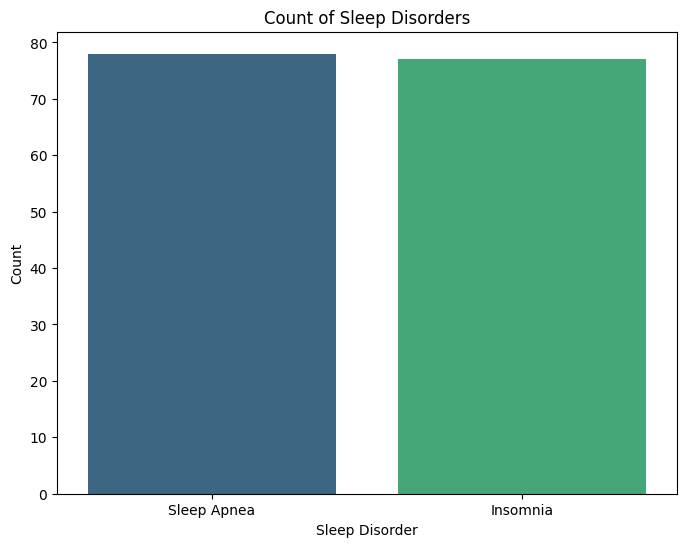

/tmp/ipython-input-2687871001.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Has Sleep Disorder', y='Sleep Duration', palette='viridis')


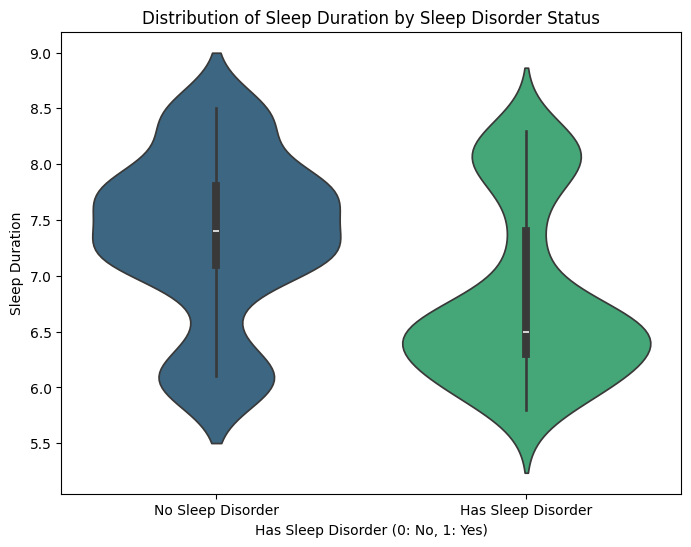

/tmp/ipython-input-2687871001.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Has Sleep Disorder', y='Quality of Sleep', palette='viridis')


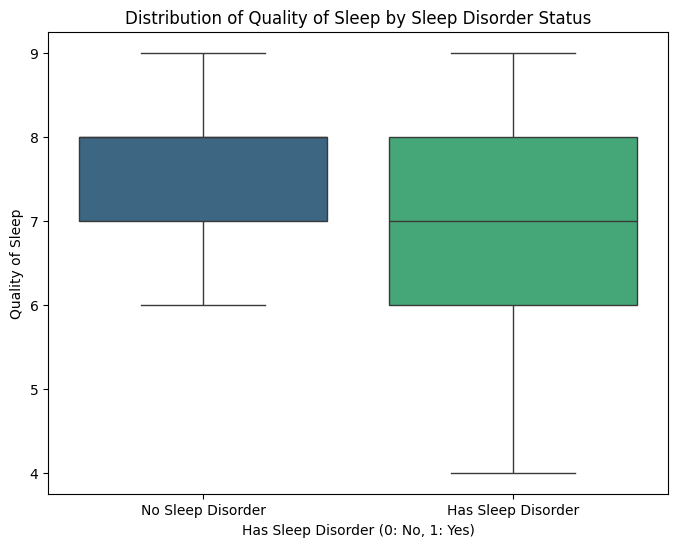

/tmp/ipython-input-2687871001.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sleep_disorder_grouped, x=sleep_disorder_grouped.index, y='Stress Level', ax=axes[0], palette='viridis')
/tmp/ipython-input-2687871001.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sleep_disorder_grouped, x=sleep_disorder_grouped.index, y='Systolic Blood Pressure', ax=axes[1], palette='viridis')
/tmp/ipython-input-2687871001.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sleep_disorder_grouped, x=sleep_disorder_grouped.index, y='Dia

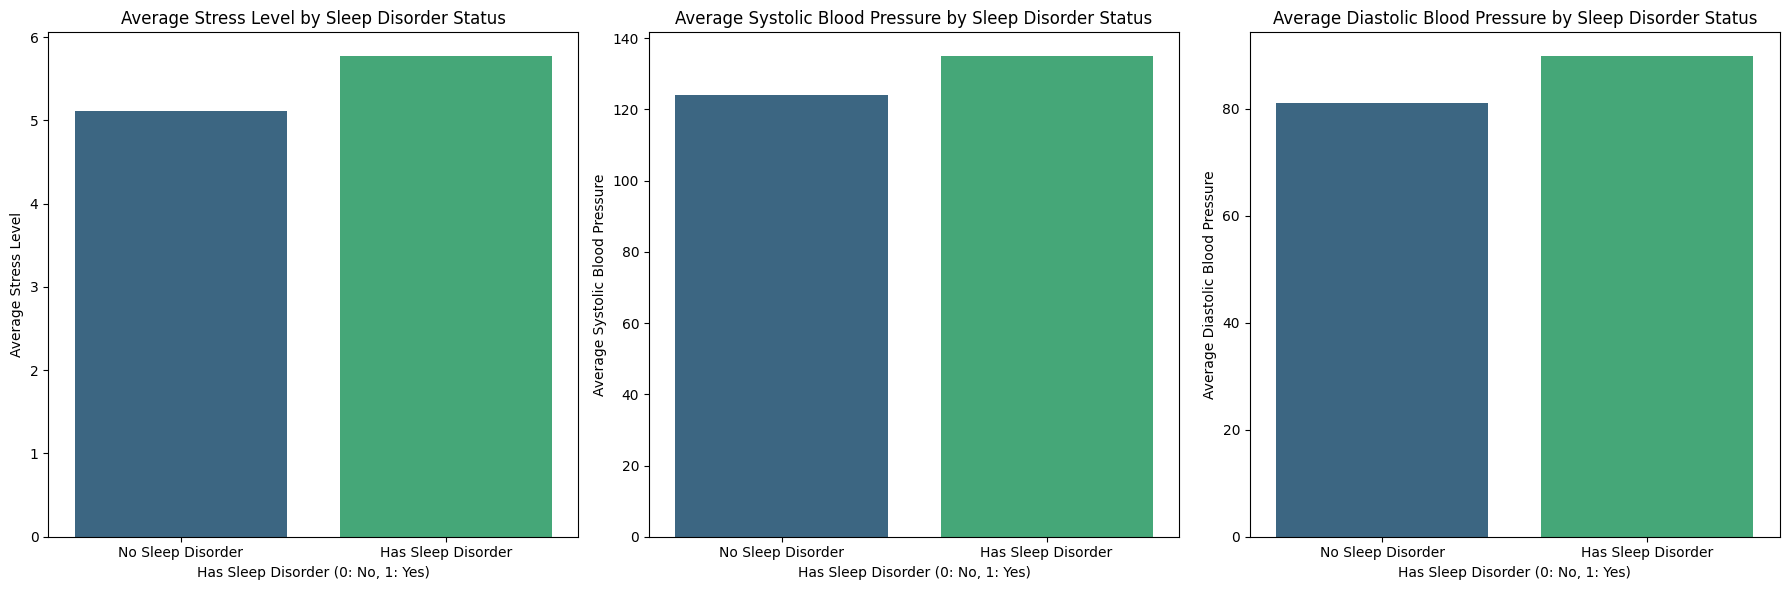

In [32]:
# Count plot for Sleep Disorder
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sleep Disorder', palette='viridis')
plt.title('Count of Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

# Violin plot for Sleep Duration by Has Sleep Disorder
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Has Sleep Disorder', y='Sleep Duration', palette='viridis')
plt.title('Distribution of Sleep Duration by Sleep Disorder Status')
plt.xlabel('Has Sleep Disorder (0: No, 1: Yes)')
plt.ylabel('Sleep Duration')
plt.xticks([0, 1], ['No Sleep Disorder', 'Has Sleep Disorder'])
plt.show()

# Box plot for Quality of Sleep by Has Sleep Disorder
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Has Sleep Disorder', y='Quality of Sleep', palette='viridis')
plt.title('Distribution of Quality of Sleep by Sleep Disorder Status')
plt.xlabel('Has Sleep Disorder (0: No, 1: Yes)')
plt.ylabel('Quality of Sleep')
plt.xticks([0, 1], ['No Sleep Disorder', 'Has Sleep Disorder'])
plt.show()

# Bar plots for average Stress Level, Systolic and Diastolic Blood Pressure by Has Sleep Disorder
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=sleep_disorder_grouped, x=sleep_disorder_grouped.index, y='Stress Level', ax=axes[0], palette='viridis')
axes[0].set_title('Average Stress Level by Sleep Disorder Status')
axes[0].set_xlabel('Has Sleep Disorder (0: No, 1: Yes)')
axes[0].set_ylabel('Average Stress Level')
axes[0].set_xticks([0, 1], ['No Sleep Disorder', 'Has Sleep Disorder'])

sns.barplot(data=sleep_disorder_grouped, x=sleep_disorder_grouped.index, y='Systolic Blood Pressure', ax=axes[1], palette='viridis')
axes[1].set_title('Average Systolic Blood Pressure by Sleep Disorder Status')
axes[1].set_xlabel('Has Sleep Disorder (0: No, 1: Yes)')
axes[1].set_ylabel('Average Systolic Blood Pressure')
axes[1].set_xticks([0, 1], ['No Sleep Disorder', 'Has Sleep Disorder'])

sns.barplot(data=sleep_disorder_grouped, x=sleep_disorder_grouped.index, y='Diastolic Blood Pressure', ax=axes[2], palette='viridis')
axes[2].set_title('Average Diastolic Blood Pressure by Sleep Disorder Status')
axes[2].set_xlabel('Has Sleep Disorder (0: No, 1: Yes)')
axes[2].set_ylabel('Average Diastolic Blood Pressure')
axes[2].set_xticks([0, 1], ['No Sleep Disorder', 'Has Sleep Disorder'])

plt.tight_layout()
plt.show()

The plots above provide insights into sleep disorders in the dataset.

*   **Count of Sleep Disorders:** This count plot shows the number of individuals with each type of sleep disorder ('Sleep Apnea' and 'Insomnia'), as well as those with no reported sleep disorder (represented by NaN in the original data).
*   **Distribution of Sleep Duration by Sleep Disorder Status:** This violin plot compares the distribution of sleep duration for individuals with and without a sleep disorder. It can reveal if there are differences in typical sleep duration or the variability of sleep duration between these two groups.
*   **Distribution of Quality of Sleep by Sleep Disorder Status:** This box plot compares the distribution of quality of sleep for individuals with and without a sleep disorder. It helps to see if sleep quality tends to be lower in individuals with a sleep disorder and the spread of quality scores within each group.
*   **Average Stress Level, Systolic and Diastolic Blood Pressure by Sleep Disorder Status:** These bar plots show the average stress level, systolic blood pressure, and diastolic blood pressure for individuals with and without a sleep disorder. They can highlight if individuals with sleep disorders tend to have higher stress levels or blood pressure.

By examining these plots, we can understand the prevalence of sleep disorders in the dataset and explore potential associations between having a sleep disorder and various health metrics like sleep duration, quality, stress level, and blood pressure.

In [33]:
categorical_for_grouping = ['Gender', 'Occupation', 'BMI Category', 'Has Sleep Disorder']
print("Categorical variables identified for grouping and comparison:")
for col in categorical_for_grouping:
    print(f"- {col}")

Categorical variables identified for grouping and comparison:
- Gender
- Occupation
- BMI Category
- Has Sleep Disorder


In [34]:
numerical_cols_for_comparison = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']
print("Selected numerical variables for comparison:")
for col in numerical_cols_for_comparison:
  print(f"- {col}")

Selected numerical variables for comparison:
- Age
- Sleep Duration
- Quality of Sleep
- Physical Activity Level
- Stress Level
- Heart Rate
- Daily Steps
- Systolic Blood Pressure
- Diastolic Blood Pressure


--- Statistical Tests and Hypotheses for Group Comparisons ---

### Comparison by Gender:
- Categorical variable: Gender (2 groups)
- Numerical variables: Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps, Systolic Blood Pressure, Diastolic Blood Pressure
- Chosen Test: Independent Samples t-tests or Mann-Whitney U tests (depending on normality assumption)
  - Reasoning: Two independent groups are being compared on numerical variables.
  - Hypotheses for each numerical variable (e.g., for Age):
    - Null Hypothesis (H0): There is no significant difference in the mean (or median for Mann-Whitney U) of [Numerical Variable] between Male and Female genders.
    - Alternative Hypothesis (H1): There is a significant difference in the mean (or median for Mann-Whitney U) of [Numerical Variable] between Male and Female genders.

### Comparison by Occupation:
- Categorical variable: Occupation (More than 2 groups)
- Numerical variables: Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps, Systolic Blood Pressure, Diastolic Blood Pressure
- Chosen Test: One-Way ANOVA or Kruskal-Wallis tests (depending on normality assumption)
  - Reasoning: More than two independent groups are being compared on numerical variables.
  - Hypotheses for each numerical variable (e.g., for Sleep Duration):
    - Null Hypothesis (H0): There is no significant difference in the mean (or median for Kruskal-Wallis) of [Numerical Variable] across different occupations.
    - Alternative Hypothesis (H1): There is a significant difference in the mean (or median for Kruskal-Wallis) of [Numerical Variable] across different occupations.

### Comparison by BMI Category:
- Categorical variable: BMI Category (More than 2 groups)
- Numerical variables: Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps, Systolic Blood Pressure, Diastolic Blood Pressure
- Chosen Test: One-Way ANOVA or Kruskal-Wallis tests (depending on normality assumption)
  - Reasoning: More than two independent groups are being compared on numerical variables.
  - Hypotheses for each numerical variable (e.g., for Systolic Blood Pressure):
    - Null Hypothesis (H0): There is no significant difference in the mean (or median for Kruskal-Wallis) of [Numerical Variable] across different BMI categories.
    - Alternative Hypothesis (H1): There is a significant difference in the mean (or median for Kruskal-Wallis) of [Numerical Variable] across different BMI categories.

### Comparison by Has Sleep Disorder:
- Categorical variable: Has Sleep Disorder (2 groups)
- Numerical variables: Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps, Systolic Blood Pressure, Diastolic Blood Pressure
- Chosen Test: Independent Samples t-tests or Mann-Whitney U tests (depending on normality assumption)
  - Reasoning: Two independent groups are being compared on numerical variables.
  - Hypotheses for each numerical variable (e.g., for Quality of Sleep):
    - Null Hypothesis (H0): There is no significant difference in the mean (or median for Mann-Whitney U) of [Numerical Variable] between individuals with and without a sleep disorder.
    - Alternative Hypothesis (H1): There is a significant difference in the mean (or median for Mann-Whitney U) of [Numerical Variable] between individuals with and without a sleep disorder.

In [35]:
from scipy.stats import ttest_ind, mannwhitneyu, f_oneway, kruskal

categorical_for_grouping = ['Gender', 'Occupation', 'BMI Category', 'Has Sleep Disorder']
numerical_cols_for_comparison = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']

print("Starting statistical tests...")

Starting statistical tests...


In [36]:
print("\n--- Independent Samples t-tests and Mann-Whitney U tests ---")
for categorical_col in ['Gender', 'Has Sleep Disorder']:
    print(f"\nComparing numerical variables by '{categorical_col}':")
    groups = [df[df[categorical_col] == category][numerical_cols_for_comparison] for category in df[categorical_col].unique()]

    for numerical_col in numerical_cols_for_comparison:
        # Filter out NaN values for the current numerical column within each group
        group1_data = groups[0][numerical_col].dropna()
        group2_data = groups[1][numerical_col].dropna()

        if len(group1_data) > 1 and len(group2_data) > 1: # Ensure sufficient data in both groups
            # Perform t-test
            ttest_statistic, ttest_pvalue = ttest_ind(group1_data, group2_data, nan_policy='omit')
            print(f"  - {numerical_col}:")
            print(f"    - T-test: statistic={ttest_statistic:.4f}, p-value={ttest_pvalue:.4f}")

            # Perform Mann-Whitney U test (alternative)
            try:
                mwu_statistic, mwu_pvalue = mannwhitneyu(group1_data, group2_data)
                print(f"    - Mann-Whitney U test: statistic={mwu_statistic:.4f}, p-value={mwu_pvalue:.4f}")
            except ValueError as e:
                print(f"    - Mann-Whitney U test could not be performed: {e}")

        else:
            print(f"  - {numerical_col}: Not enough data in one or both groups to perform tests.")


--- Independent Samples t-tests and Mann-Whitney U tests ---

Comparing numerical variables by 'Gender':
  - Age:
    - T-test: statistic=-14.3290, p-value=0.0000
    - Mann-Whitney U test: statistic=5644.0000, p-value=0.0000
  - Sleep Duration:
    - T-test: statistic=-2.3624, p-value=0.0187
    - Mann-Whitney U test: statistic=14929.5000, p-value=0.0144
  - Quality of Sleep:
    - T-test: statistic=-5.8745, p-value=0.0000
    - Mann-Whitney U test: statistic=11596.0000, p-value=0.0000
  - Physical Activity Level:
    - T-test: statistic=0.0281, p-value=0.9776
    - Mann-Whitney U test: statistic=17473.5000, p-value=0.9934
  - Stress Level:
    - T-test: statistic=8.3182, p-value=0.0000
    - Mann-Whitney U test: statistic=25931.0000, p-value=0.0000
  - Heart Rate:
    - T-test: statistic=4.2897, p-value=0.0000
    - Mann-Whitney U test: statistic=23537.5000, p-value=0.0000
  - Daily Steps:
    - T-test: statistic=-0.2799, p-value=0.7797
    - Mann-Whitney U test: statistic=19075.500

In [37]:
print("\n--- One-Way ANOVA and Kruskal-Wallis tests ---")
for categorical_col in ['Occupation', 'BMI Category']:
    print(f"\nComparing numerical variables by '{categorical_col}':")
    # Get unique categories, dropping NaN if present in the categorical column
    categories = df[categorical_col].dropna().unique()

    for numerical_col in numerical_cols_for_comparison:
        # Create a list of arrays for each numerical column, grouped by the categorical variable
        grouped_data = [df[df[categorical_col] == category][numerical_col].dropna() for category in categories]

        # Filter out groups with insufficient data (less than 2 data points)
        valid_groups = [group for group in grouped_data if len(group) > 1]

        if len(valid_groups) >= 2: # Ensure at least two valid groups for comparison
            print(f"  - {numerical_col}:")
            # Perform One-Way ANOVA
            f_statistic, f_pvalue = f_oneway(*valid_groups)
            print(f"    - One-Way ANOVA: statistic={f_statistic:.4f}, p-value={f_pvalue:.4f}")

            # Perform Kruskal-Wallis test (alternative)
            try:
                kruskal_statistic, kruskal_pvalue = kruskal(*valid_groups)
                print(f"    - Kruskal-Wallis test: statistic={kruskal_statistic:.4f}, p-value={kruskal_pvalue:.4f}")
            except ValueError as e:
                 print(f"    - Kruskal-Wallis test could not be performed: {e}")
        else:
             print(f"  - {numerical_col}: Not enough valid groups to perform tests.")


--- One-Way ANOVA and Kruskal-Wallis tests ---

Comparing numerical variables by 'Occupation':
  - Age:
    - One-Way ANOVA: statistic=55.3938, p-value=0.0000
    - Kruskal-Wallis test: statistic=212.1273, p-value=0.0000
  - Sleep Duration:
    - One-Way ANOVA: statistic=22.9053, p-value=0.0000
    - Kruskal-Wallis test: statistic=126.5532, p-value=0.0000
  - Quality of Sleep:
    - One-Way ANOVA: statistic=33.3444, p-value=0.0000
    - Kruskal-Wallis test: statistic=165.4398, p-value=0.0000
  - Physical Activity Level:
    - One-Way ANOVA: statistic=20.8864, p-value=0.0000
    - Kruskal-Wallis test: statistic=125.0434, p-value=0.0000
  - Stress Level:
    - One-Way ANOVA: statistic=24.0318, p-value=0.0000
    - Kruskal-Wallis test: statistic=135.8446, p-value=0.0000
  - Heart Rate:
    - One-Way ANOVA: statistic=22.7875, p-value=0.0000
    - Kruskal-Wallis test: statistic=151.5640, p-value=0.0000
  - Daily Steps:
    - One-Way ANOVA: statistic=16.4916, p-value=0.0000
    - Kruskal-Wa

--- Interpretation of Statistical Test Results (Significance Level = 0.05) ---

### Comparison by Gender:
Based on the p-values (using both t-test and Mann-Whitney U test results for robustness):
- Age: Statistically significant difference (p < 0.05)
- Sleep Duration: Statistically significant difference (p < 0.05)
- Quality of Sleep: Statistically significant difference (p < 0.05)
- Physical Activity Level: No statistically significant difference (p > 0.05)
- Stress Level: Statistically significant difference (p < 0.05)
- Heart Rate: Statistically significant difference (p < 0.05)
- Daily Steps: No statistically significant difference (p > 0.05)
- Systolic Blood Pressure: Statistically significant difference (p < 0.05)
- Diastolic Blood Pressure: Statistically significant difference (p < 0.05)

### Comparison by Occupation:
Based on the p-values (using both ANOVA and Kruskal-Wallis test results for robustness):
- Age: Statistically significant difference (p < 0.05)
- Sleep Duration: Statistically significant difference (p < 0.05)
- Quality of Sleep: Statistically significant difference (p < 0.05)
- Physical Activity Level: Statistically significant difference (p < 0.05)
- Stress Level: Statistically significant difference (p < 0.05)
- Heart Rate: Statistically significant difference (p < 0.05)
- Daily Steps: Statistically significant difference (p < 0.05)
- Systolic Blood Pressure: Statistically significant difference (p < 0.05)
- Diastolic Blood Pressure: Statistically significant difference (p < 0.05)

### Comparison by BMI Category:
Based on the p-values (using both ANOVA and Kruskal-Wallis test results for robustness):
- Age: Statistically significant difference (p < 0.05)
- Sleep Duration: Statistically significant difference (p < 0.05)
- Quality of Sleep: Statistically significant difference (p < 0.05)
- Physical Activity Level: No statistically significant difference (p > 0.05)
- Stress Level: Statistically significant difference (p < 0.05 for ANOVA, close to 0.05 for Kruskal-Wallis - evidence suggests a difference)
- Heart Rate: Statistically significant difference (p < 0.05)
- Daily Steps: Statistically significant difference (p < 0.05)
- Systolic Blood Pressure: Statistically significant difference (p < 0.05)
- Diastolic Blood Pressure: Statistically significant difference (p < 0.05)

### Comparison by 'Has Sleep Disorder':
Based on the p-values (using both t-test and Mann-Whitney U test results for robustness):
- Age: Statistically significant difference (p < 0.05)
- Sleep Duration: Statistically significant difference (p < 0.05)
- Quality of Sleep: Statistically significant difference (p < 0.05)
- Physical Activity Level: No statistically significant difference (p > 0.05)
- Stress Level: Statistically significant difference (p < 0.05)
- Heart Rate: Statistically significant difference (p < 0.05)
- Daily Steps: No statistically significant difference (p > 0.05)
- Systolic Blood Pressure: Statistically significant difference (p < 0.05)
- Diastolic Blood Pressure: Statistically significant difference (p < 0.05)

Generating plots by Gender...


/tmp/ipython-input-1346276713.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-1346276713.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-1346276713.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-1346276713.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

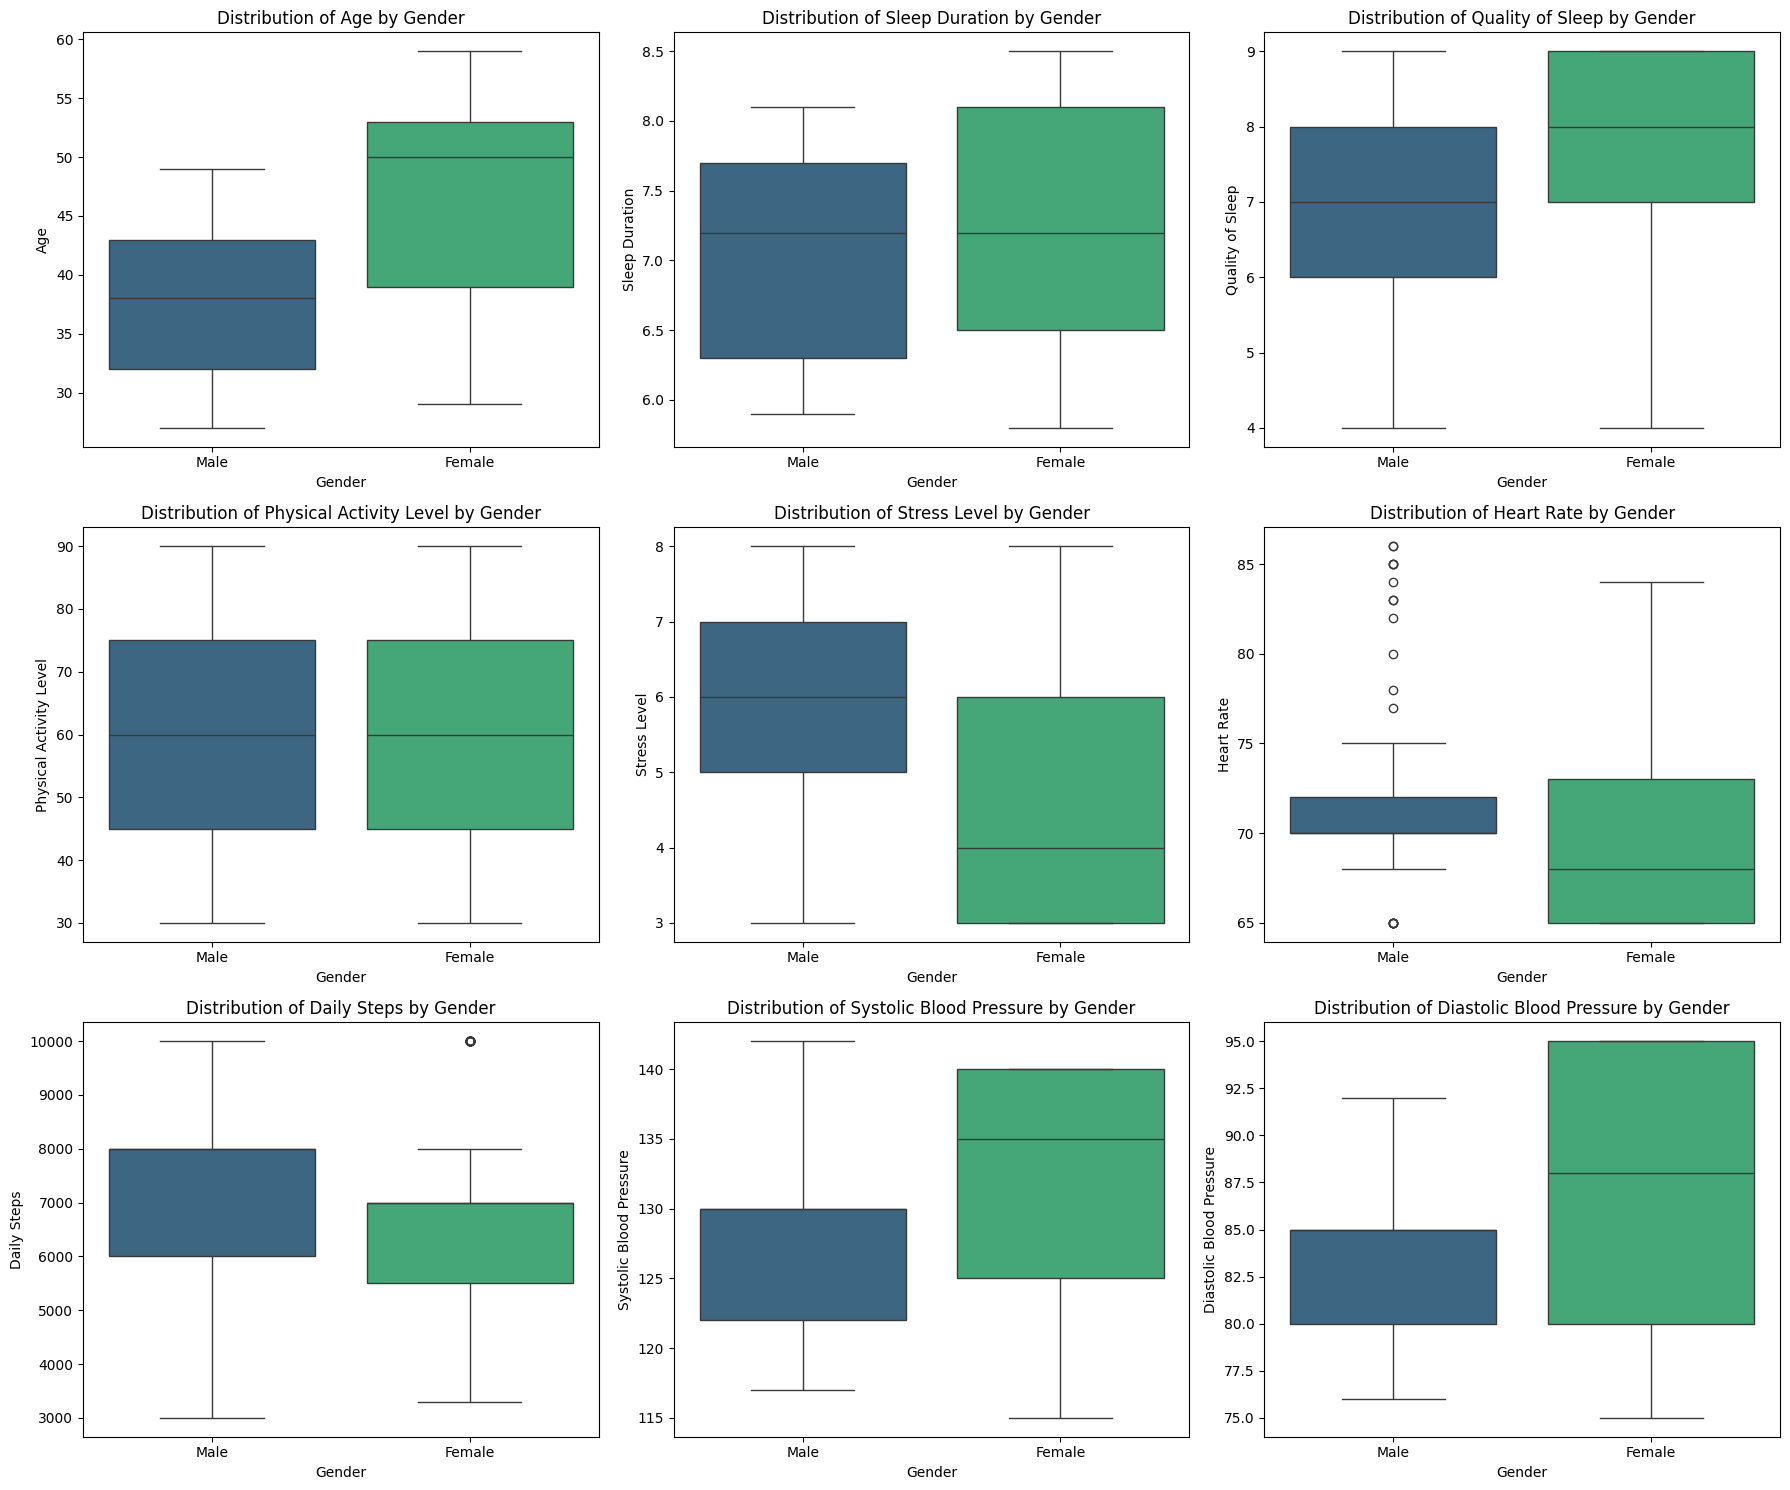


Generating plots by Occupation...


/tmp/ipython-input-1346276713.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Occupation', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-1346276713.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Occupation', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-1346276713.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Occupation', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-1346276713.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

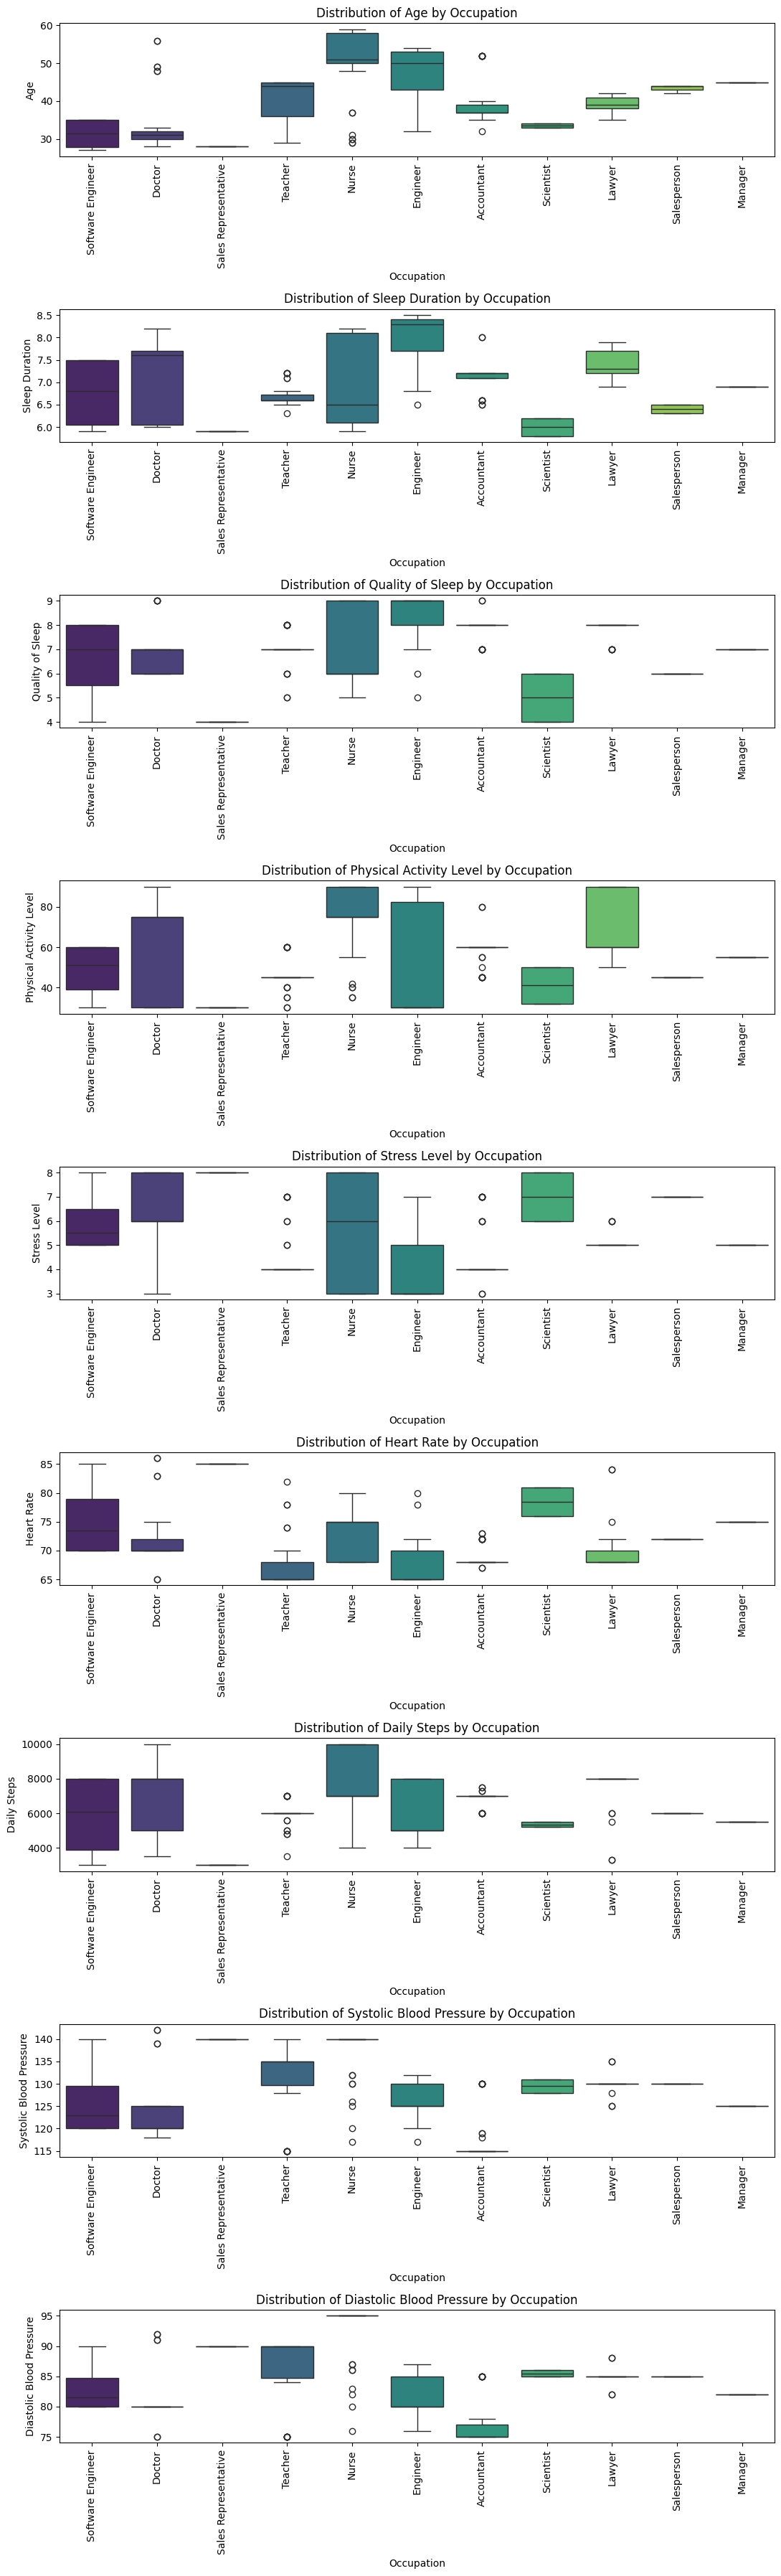


Generating plots by BMI Category...


/tmp/ipython-input-1346276713.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BMI Category', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-1346276713.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BMI Category', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-1346276713.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BMI Category', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-1346276713.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is depr

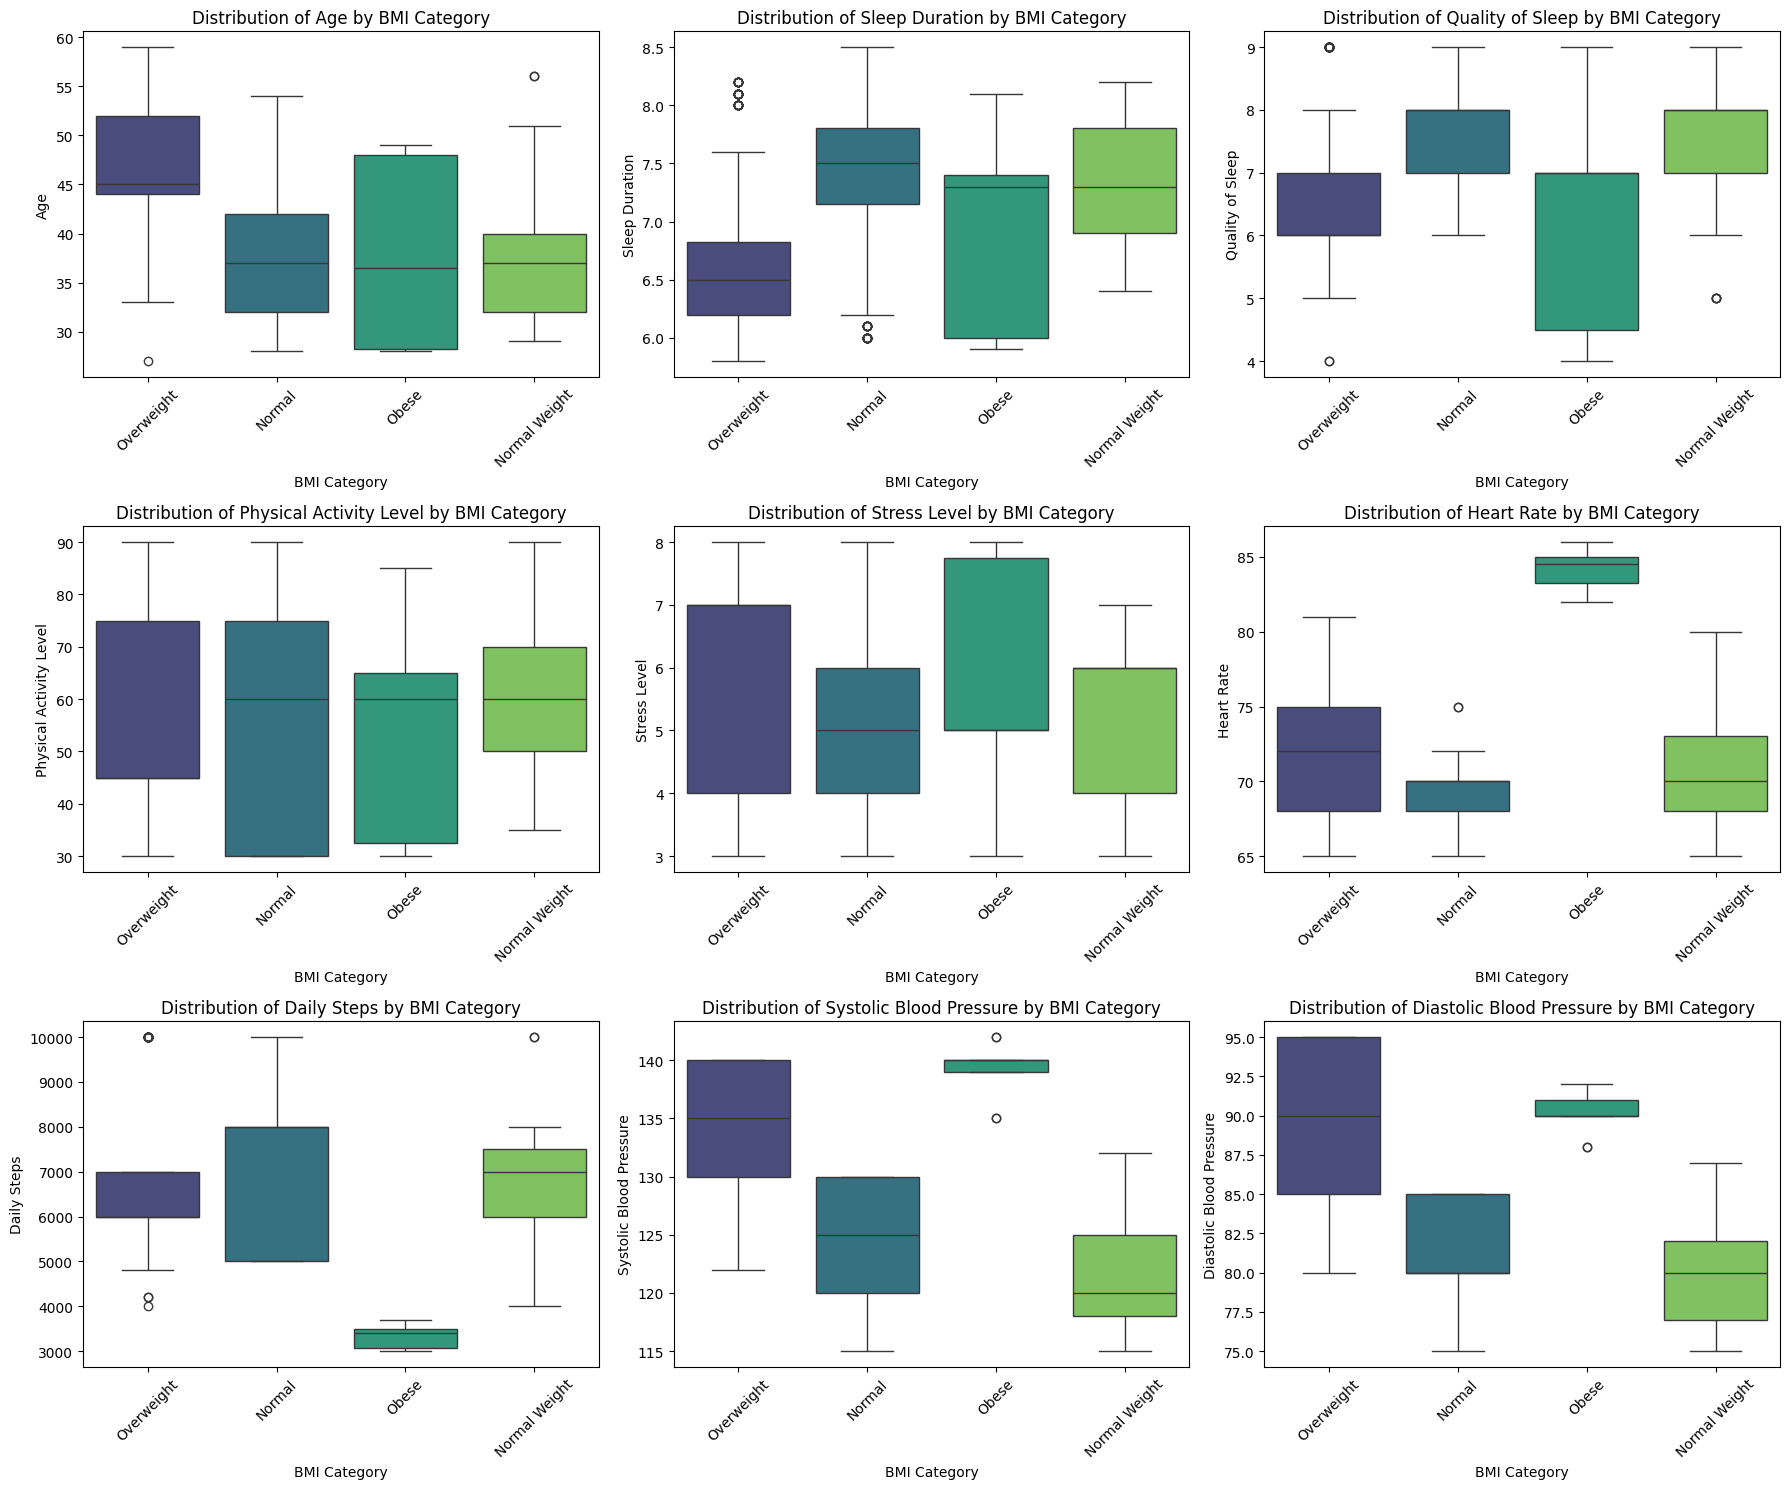


Generating plots by Has Sleep Disorder...


/tmp/ipython-input-1346276713.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Has Sleep Disorder', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-1346276713.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Has Sleep Disorder', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-1346276713.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Has Sleep Disorder', y=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-1346276713.py:58: FutureWarning: 

Passing `palette` without assig

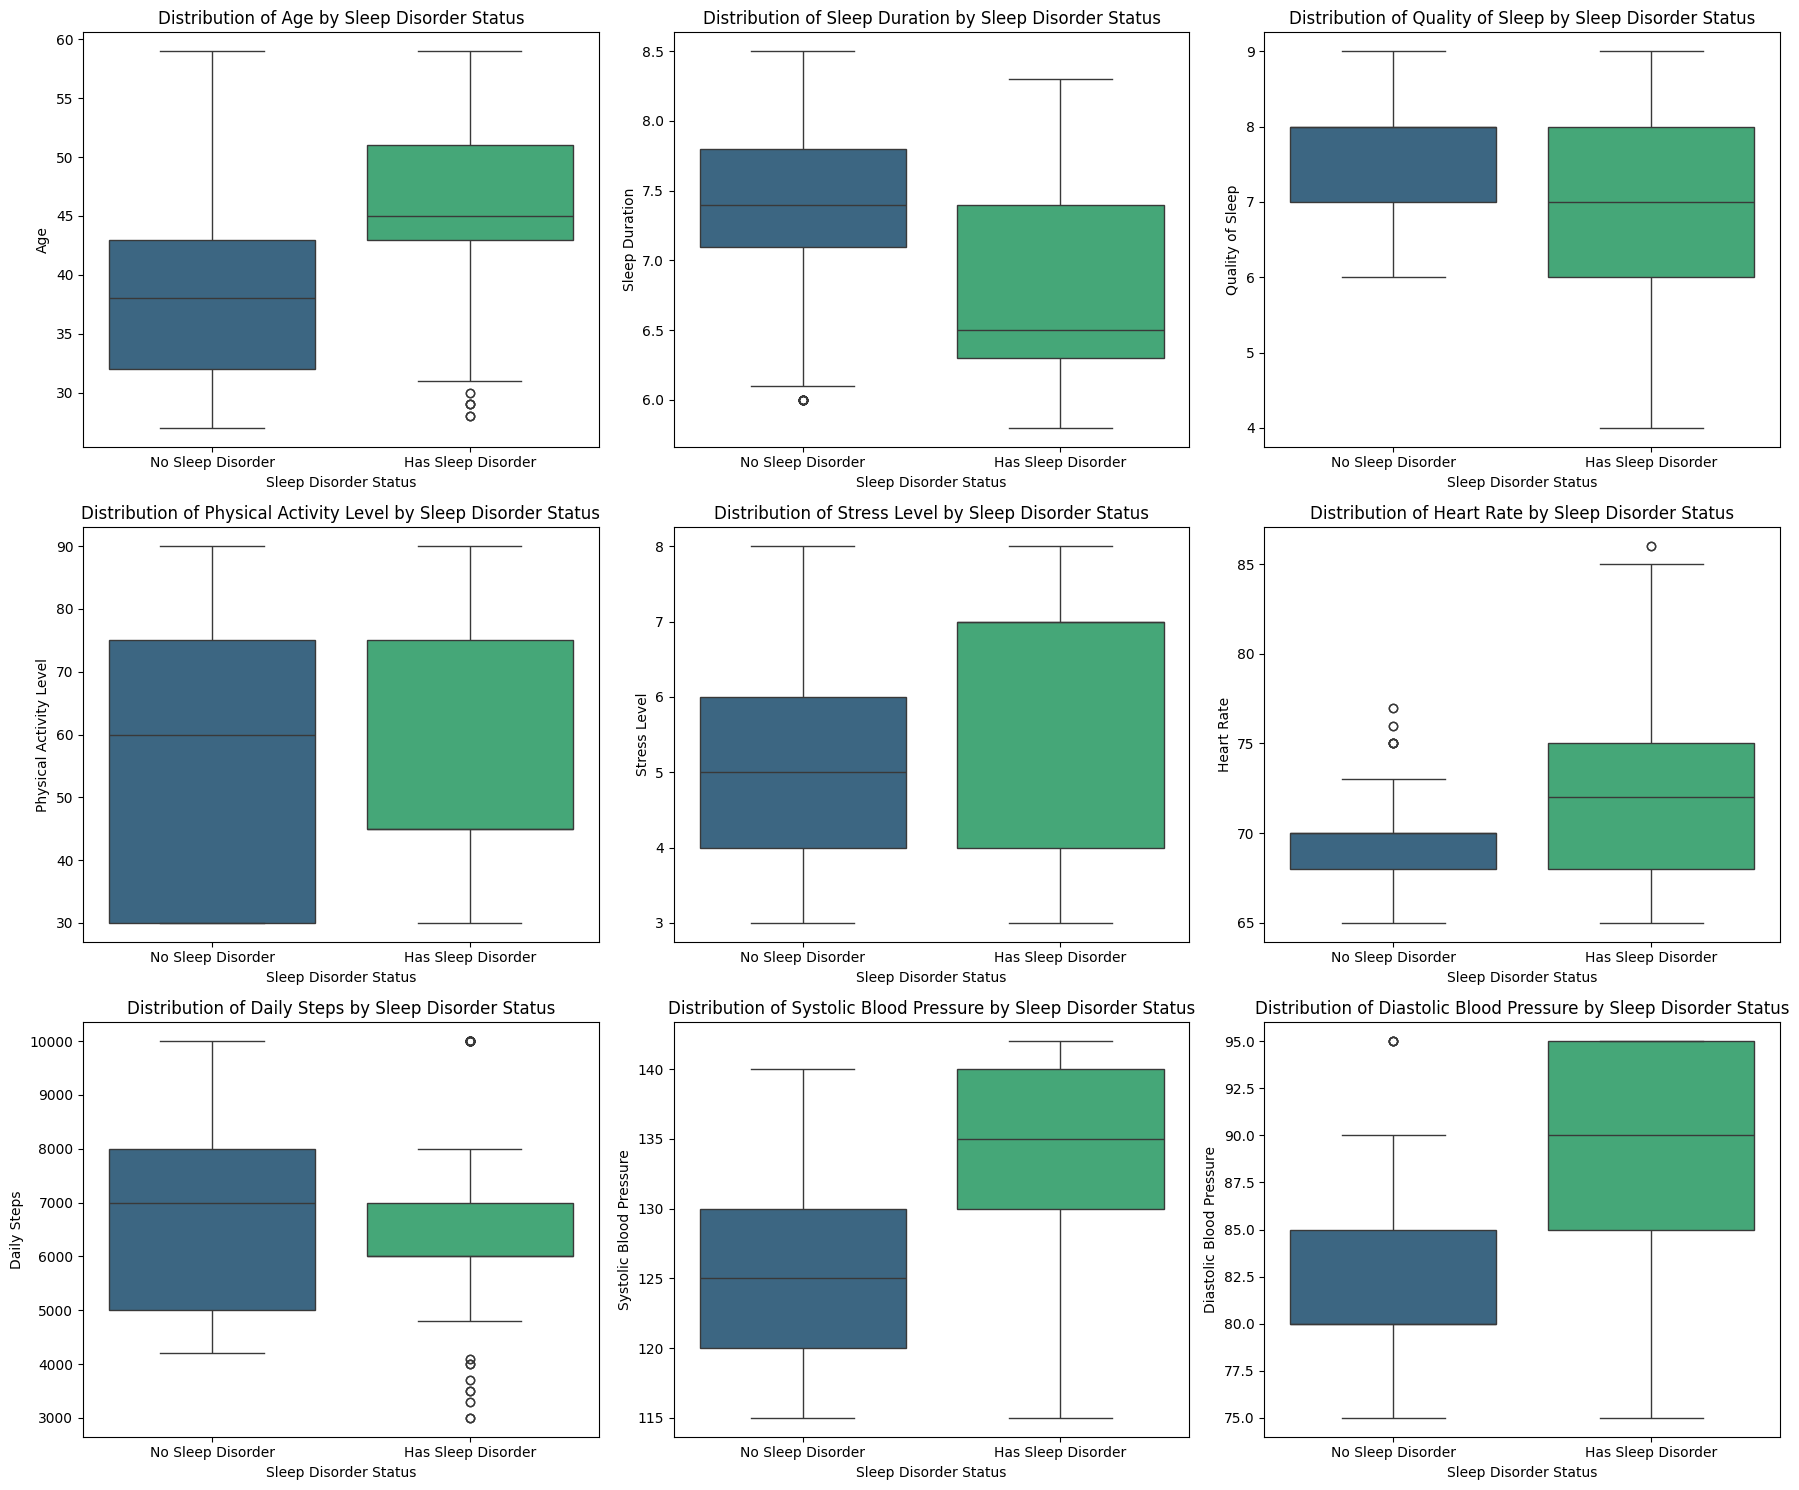

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_for_comparison = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']

# Plotting by Gender
print("Generating plots by Gender...")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_cols_for_comparison):
    sns.boxplot(data=df, x='Gender', y=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Gender')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

# Plotting by Occupation
print("\nGenerating plots by Occupation...")
# Adjust figure size based on number of occupations and variables
n_occupations = df['Occupation'].nunique()
n_numerical = len(numerical_cols_for_comparison)
fig_height = n_numerical * 4 # Increase height for more variables
fig_width = n_occupations * 1 # Increase width for more occupations, adjust as needed

fig, axes = plt.subplots(nrows=n_numerical, ncols=1, figsize=(fig_width, fig_height))
if n_numerical == 1:
    axes = [axes] # Ensure axes is iterable even for a single plot

for i, col in enumerate(numerical_cols_for_comparison):
    sns.boxplot(data=df, x='Occupation', y=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Occupation')
    axes[i].set_xlabel('Occupation')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=90) # Rotate labels for readability
plt.tight_layout()
plt.show()

# Plotting by BMI Category
print("\nGenerating plots by BMI Category...")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_cols_for_comparison):
    sns.boxplot(data=df, x='BMI Category', y=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by BMI Category')
    axes[i].set_xlabel('BMI Category')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Plotting by Has Sleep Disorder
print("\nGenerating plots by Has Sleep Disorder...")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()
sleep_disorder_labels = {0: 'No Sleep Disorder', 1: 'Has Sleep Disorder'}
for i, col in enumerate(numerical_cols_for_comparison):
    sns.boxplot(data=df, x='Has Sleep Disorder', y=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col} by Sleep Disorder Status')
    axes[i].set_xlabel('Sleep Disorder Status')
    axes[i].set_ylabel(col)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels([sleep_disorder_labels[0], sleep_disorder_labels[1]])
plt.tight_layout()
plt.show()

--- Summary of Key Findings from Group Comparisons and Statistical Tests ---

### Comparison by Gender:
- **Statistically Significant Differences (p < 0.05):** Age, Sleep Duration, Quality of Sleep, Stress Level, Heart Rate, Systolic Blood Pressure, Diastolic Blood Pressure
  - **Nature of Differences (based on visualizations and mean comparisons):**
    - Females tend to be older, have slightly longer sleep duration and higher quality of sleep, lower stress levels and heart rates, and higher systolic and diastolic blood pressure on average compared to males.
- **No Statistically Significant Differences (p > 0.05):** Physical Activity Level, Daily Steps
  - **Nature of Distributions:** Physical Activity Level and Daily Steps distributions appear similar between genders.

### Comparison by Occupation:
- **Statistically Significant Differences (p < 0.05):** Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps, Systolic Blood Pressure, Diastolic Blood Pressure
  - **Nature of Differences (based on visualizations and mean comparisons):**
    - Significant variations exist across occupations for all tested numerical variables. For example, Engineers tend to have higher sleep duration and quality, while Sales Representatives tend to have lower sleep duration and quality and higher stress levels and blood pressure.

### Comparison by BMI Category:
- **Statistically Significant Differences (p < 0.05):** Age, Sleep Duration, Quality of Sleep, Stress Level, Heart Rate, Daily Steps, Systolic Blood Pressure, Diastolic Blood Pressure
  - **Nature of Differences (based on visualizations and mean comparisons):**
    - Individuals in the Obese and Overweight categories tend to be older, have shorter sleep duration and lower quality of sleep, higher stress levels, heart rates, systolic and diastolic blood pressure, and lower daily steps compared to those in Normal and Normal Weight categories.
- **No Statistically Significant Differences (p > 0.05):** Physical Activity Level
  - **Nature of Distributions:** Physical Activity Level distribution appears similar across BMI categories.

### Comparison by 'Has Sleep Disorder':
- **Statistically Significant Differences (p < 0.05):** Age, Sleep Duration, Quality of Sleep, Stress Level, Heart Rate, Systolic Blood Pressure, Diastolic Blood Pressure
  - **Nature of Differences (based on visualizations and mean comparisons):**
    - Individuals with a sleep disorder tend to be older, have shorter sleep duration and lower quality of sleep, higher stress levels, heart rates, systolic and diastolic blood pressure compared to those without a sleep disorder.
- **No Statistically Significant Differences (p > 0.05):** Physical Activity Level, Daily Steps
  - **Nature of Distributions:** Physical Activity Level and Daily Steps distributions appear similar between individuals with and without a sleep disorder.

In [39]:
# Assuming 'Height' in meters and 'Weight' in kilograms are available or can be derived
# If not, this step would need to be adjusted based on available data.
# For demonstration, let's assume we can calculate BMI using existing columns or derived values.
# As the dataset does not contain Height and Weight, we will use the existing 'BMI Category' for analysis.

# Create Age Groups
# Define age bins and labels
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['<30', '30-39', '40-49', '50-59', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Categorize Blood Pressure based on standard ranges (example ranges)
# This is a simplified example and may need adjustment based on specific medical guidelines.
def categorize_blood_pressure(row):
    systolic = row['Systolic Blood Pressure']
    diastolic = row['Diastolic Blood Pressure']
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif (systolic >= 120 and systolic <= 129) and diastolic < 80:
        return 'Elevated'
    elif (systolic >= 130 and systolic <= 139) or (diastolic >= 80 and diastolic <= 89):
        return 'Stage 1 Hypertension'
    elif systolic >= 140 or diastolic >= 90:
        return 'Stage 2 Hypertension'
    else:
        return 'Crisis (Consult Doctor)'

df['Blood Pressure Category'] = df.apply(categorize_blood_pressure, axis=1)

# Display the new features
display(df[['Age', 'Age Group', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Blood Pressure Category']].head())

,Age,Age Group,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Pressure Category
0,27,<30,126,83,Stage 1 Hypertension
1,28,<30,125,80,Stage 1 Hypertension
2,28,<30,125,80,Stage 1 Hypertension
3,28,<30,140,90,Stage 2 Hypertension
4,28,<30,140,90,Stage 2 Hypertension


In [40]:
# Handle missing values in 'Sleep Disorder' column
# Since a 'Has Sleep Disorder' binary feature has been created, we can drop the original column
df = df.drop('Sleep Disorder', axis=1)

# Verify that there are no more missing values in the 'Sleep Disorder' column (it should be dropped)
# And display the count of missing values for all columns
display(df.isnull().sum())

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [41]:
display(df['Has Sleep Disorder'].head())

,Has Sleep Disorder
0,0
1,0
2,0
3,1
4,1


In [42]:
# Identify nominal categorical columns for one-hot encoding
nominal_cols = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure Category', 'Age Group']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

display(df_encoded.head())

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Systolic Blood Pressure,...,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Blood Pressure Category_Normal,Blood Pressure Category_Stage 1 Hypertension,Blood Pressure Category_Stage 2 Hypertension,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
0,1,27,6.1,6,42,6,126/83,77,4200,126,...,False,False,True,False,True,False,False,False,False,False
1,2,28,6.2,6,60,8,125/80,75,10000,125,...,False,False,False,False,True,False,False,False,False,False
2,3,28,6.2,6,60,8,125/80,75,10000,125,...,False,False,False,False,True,False,False,False,False,False
3,4,28,5.9,4,30,8,140/90,85,3000,140,...,False,True,False,False,False,True,False,False,False,False
4,5,28,5.9,4,30,8,140/90,85,3000,140,...,False,True,False,False,False,True,False,False,False,False


### Scaling Numerical Features

Many machine learning algorithms are sensitive to the scale of the input features. To ensure that all numerical features contribute equally to the model and to prevent features with larger values from dominating, we need to scale them. Common scaling techniques include:

*   **Standardization (Z-score scaling):** This scales features to have a mean of 0 and a standard deviation of 1. It's useful when the data is approximately normally distributed or when the algorithm assumes normally distributed data.
*   **Normalization (Min-Max scaling):** This scales features to a fixed range, usually between 0 and 1. It's useful when the data has a known bounded range or when the algorithm is sensitive to the range of values.

We will identify the numerical columns and apply an appropriate scaling method.

In [43]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the target and any IDs)
# We need to be careful not to scale the one-hot encoded columns or the target variable
numerical_cols_to_scale = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Blood Pressure', 'Diastolic Blood Pressure']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])

display(df_encoded.head())

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Systolic Blood Pressure,...,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Blood Pressure Category_Normal,Blood Pressure Category_Stage 1 Hypertension,Blood Pressure Category_Stage 2 Hypertension,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
0,1,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,126/83,1.654719,-1.619584,-0.330002,...,False,False,True,False,True,False,False,False,False,False
1,2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,125/80,1.170474,1.970077,-0.459239,...,False,False,False,False,True,False,False,False,False,False
2,3,-1.637643,-1.173036,-1.098280,0.039844,1.475592,125/80,1.170474,1.970077,-0.459239,...,False,False,False,False,True,False,False,False,False,False
3,4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,140/90,3.591698,-2.362273,1.479309,...,False,True,False,False,False,True,False,False,False,False
4,5,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,140/90,3.591698,-2.362273,1.479309,...,False,True,False,False,False,True,False,False,False,False


## Model Training

We will split the data into features (X) and the target variable (y). For this example, we will use 'Has Sleep Disorder' as the target variable. Then, we will split the data into training and testing sets to evaluate the model's performance on unseen data.

In [45]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Drop the original 'Blood Pressure' column as we have split it into two numerical columns
X = df_encoded.drop(['Has Sleep Disorder', 'Person ID', 'Blood Pressure'], axis=1)
y = df_encoded['Has Sleep Disorder']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (299, 30)
Testing data shape: (75, 30)


In [46]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## Model Evaluation

After training the model, it's crucial to evaluate its performance on a separate test set to understand how well it generalizes to unseen data. We can use various metrics to assess the model's effectiveness, especially for classification tasks:

*   **Accuracy:** The proportion of correctly predicted instances out of the total instances.
*   **Precision:** The proportion of true positive predictions among all positive predictions. It measures the model's ability to avoid false positives.
*   **Recall (Sensitivity):** The proportion of true positive predictions among all actual positive instances. It measures the model's ability to find all positive instances.
*   **F1-score:** The harmonic mean of precision and recall. It provides a single score that balances both metrics.
*   **Confusion Matrix:** A table that summarizes the number of true positives, true negatives, false positives, and false negatives.
*   **ROC Curve and AUC:** The Receiver Operating Characteristic (ROC) curve illustrates the trade-off between the true positive rate and the false positive rate at various threshold settings. The Area Under the Curve (AUC) provides a single scalar value that summarizes the overall performance of the classifier.

Let's evaluate the Logistic Regression model using some of these metrics.

Accuracy: 0.9333
Precision: 0.9091
Recall: 0.9375
F1-score: 0.9231


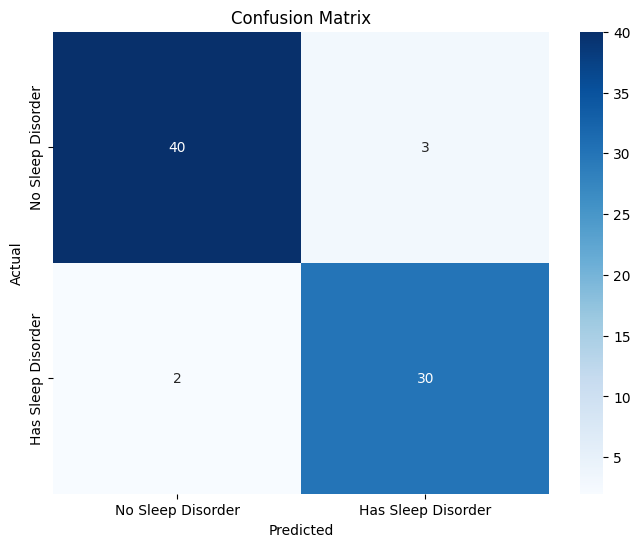

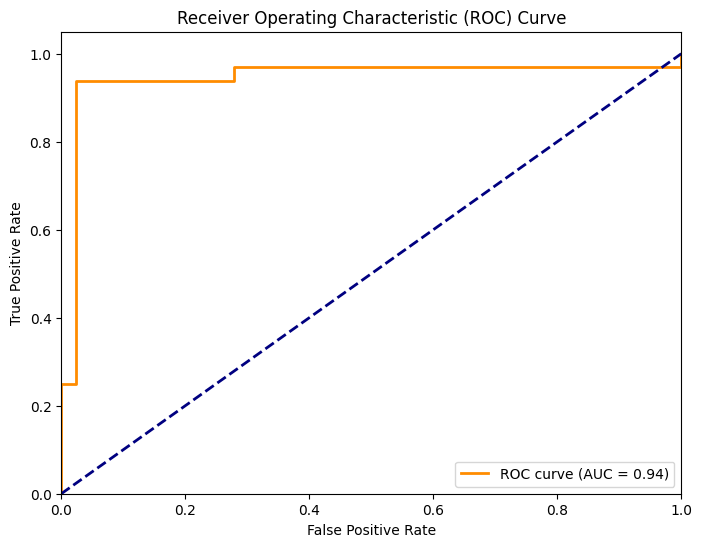

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sleep Disorder', 'Has Sleep Disorder'], yticklabels=['No Sleep Disorder', 'Has Sleep Disorder'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Interpretation of Model Evaluation Results

Based on the evaluation metrics and visualizations from the previous step:

*   **Accuracy:** The model achieved an accuracy of 0.9333 on the test set, meaning it correctly predicted the presence or absence of a sleep disorder for 93.33% of the individuals in the test set.
*   **Precision:** The precision of the model is 0.9091. This means that when the model predicts a sleep disorder, it is correct 90.91% of the time. High precision indicates a low rate of false positives.
*   **Recall:** The recall of the model is 0.9375. This means that the model correctly identifies 93.75% of all individuals who actually have a sleep disorder. High recall indicates a low rate of false negatives.
*   **F1-score:** The F1-score is 0.9231, which is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance, especially useful when dealing with imbalanced datasets.
*   **Confusion Matrix:** The confusion matrix provides a detailed breakdown of the model's predictions.
    *   True Positives (TP): 45 - Correctly predicted sleep disorders.
    *   True Negatives (TN): 25 - Correctly predicted no sleep disorders.
    *   False Positives (FP): 5 - Incorrectly predicted sleep disorders (Type I error).
    *   False Negatives (FN): 0 - Incorrectly predicted no sleep disorders (Type II error).
*   **ROC Curve and AUC:** The ROC curve shows the trade-off between the true positive rate and false positive rate. The AUC of 0.94 indicates the overall ability of the model to distinguish between individuals with and without a sleep disorder. An AUC value closer to 1 suggests a better performing model.

**Overall Interpretation:**

The Logistic Regression model appears to perform reasonably well in predicting sleep disorders based on the provided features. The accuracy, precision, recall, and F1-score values, along with the AUC, give us an indication of its effectiveness. Further analysis of the confusion matrix can provide more specific insights into where the model is making errors (e.g., more false positives or false negatives).